**PREDICTING BARRIERS TO FINANCIAL INCLUSION AMONG RURAL YOUTH IN KENYA**


**Business Understanding**

The FinAccess 2024 Household Survey reveals a complex landscape of financial inclusion in Kenya. While significant progress has been made, disparities persist across counties, rural youth remain disproportionately excluded, and issues related to consumer protection and rising debt stress are of growing concern. This capstone project aims to leverage the FinAccess 2024 dataset to provide data-driven insights that can inform policy and interventions.

**Objectives of the Study**

Understand why rural youth (aged 18–35) in Kenya remain largely excluded from financial services, and identify the key demographic, technological, and economic barriers they face

**Success Criteria**

  Build a reliable predictive model (70% accuracy / F1-score)

  Highlight the top contributing features/barriers

  Visualize findings to inform FSD Kenya and CBK interventions


**Research Questions**

• What percentage of rural youth are financially excluded?

• What factors (e.g. no ID, lack of phone, education, income) are most predictive of exclusion?

• Are there regional (county-level) patterns in youth exclusion?


**Data Understanding**

**Data Sources**

• 2024_Finaccess_Publicdata2.xlsx: Individual-level responses on financial behavior and demographics



In [6]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# loading the dataset
df = pd.read_excel('2024_Finaccess_Publicdata2.xlsx')

In [8]:
df

A18. AGE OF RESPONDENT Sex of a household member        County  \
0                          29                    Female       Garissa   
1                          35                    Female         Busia   
2                          24                      Male        Kiambu   
3                          20                    Female      Murang'a   
4                          27                    Female        Kisumu   
...                       ...                       ...           ...   
10474                      19                    Female        Kilifi   
10475                      32                    Female       Makueni   
10476                      31                    Female         Kisii   
10477                      24                    Female  Nairobi City   
10478                      32                    Female  Taita-Taveta   

                                A20. Education Completed  \
0      Completed technical training after secondary s...   
1                                    "Primary completed"   
2                                       "Some secondary"   
3         Some technical training after secondary school   
4                                    "Primary completed"   
...                                                  ...   
10474                                "Primary completed"   
10475                             "Secondary completed "   
10476                                    "Some primary "   
10477                                   "Some secondary"   
10478                                "Primary completed"   

               A21. Marital Status  HH_roster_size_ex12ii  \
0      Married/Living with partner                      5   
1               Divorced/separated                      2   
2             Single/Never Married                      1   
3             Single/Never Married                      1   
4      Married/Living with partner                      4   
...                            ...                    ...   
10474         Single/Never Married                      8   
10475         Single/Never Married                      1   
10476  Married/Living with partner                      6   
10477  Married/Living with partner                      4   
10478         Single/Never Married                      7   

       B3A. Running own business/Self employed  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
10474                                        1   
10475                                        1   
10476                                        0   
10477                                        0   
10478                                        1   

       B3A. Casual worker/Seasonal Worker  \
0                                       0   
1                                       1   
2                                       1   
3                                       0   
4                                       1   
...                                   ...   
10474                                   0   
10475                                   0   
10476                                   0   
10477                                   0   
10478                                   0   

      C1_12. Registered on a bank/microfinance Bank account  K3__1:MPesa  ...  \
0                                          Currently use             1.0  ...   
1                                             Never used             1.0  ...   
2                                             Never used             1.0  ...   
3                                          Currently use             1.0  ...   
4                                             Never used             1.0  ...   
...                                             

In [9]:
df.head()

A18. AGE OF RESPONDENT Sex of a household member    County  \
0                      29                    Female   Garissa   
1                      35                    Female     Busia   
2                      24                      Male    Kiambu   
3                      20                    Female  Murang'a   
4                      27                    Female    Kisumu   

                            A20. Education Completed  \
0  Completed technical training after secondary s...   
1                                "Primary completed"   
2                                   "Some secondary"   
3     Some technical training after secondary school   
4                                "Primary completed"   

           A21. Marital Status  HH_roster_size_ex12ii  \
0  Married/Living with partner                      5   
1           Divorced/separated                      2   
2         Single/Never Married                      1   
3         Single/Never Married                      1   
4  Married/Living with partner                      4   

   B3A. Running own business/Self employed  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   B3A. Casual worker/Seasonal Worker  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   1   

  C1_12. Registered on a bank/microfinance Bank account  K3__1:MPesa  ...  \
0                                      Currently use             1.0  ...   
1                                         Never used             1.0  ...   
2                                         Never used             1.0  ...   
3                                      Currently use             1.0  ...   
4                                         Never used             1.0  ...   

   N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable  \
0                                                0.0                                 
1                                                NaN                                 
2                                                0.0                                 
3                                                0.0                                 
4                                                1.0                                 

  D. Geographic Access Barriers  \
0                           NaN   
1                           NaN   
2                           NaN   
3                           NaN   
4                           NaN   

  T1. Which is the nearest financial service provider (any) from where you live?  \
0  Mobile Money Agent (for depositing or withdraw...                               
1  Mobile Money Agent (for depositing or withdraw...                               
2  Mobile Money Agent (for depositing or withdraw...                               
3  Mobile Money Agent (for depositing or withdraw...                               
4  Mobile Money Agent (for depositing or withdraw...                               

  T2 what is the average cost to go there by public transport to financial provide  \
0  Close enough to walk to and fro - No need to s...                                 
1  Close enough to walk to and fro - No need to s...                                 
2  Close enough to walk to and fro - No need to s...                                 
3  Close enough to walk to and fro - No need to s...                                 
4  Close enough to walk to and fro - No need to s...                                 

                               B2A. Financial Advice  \
0      Advice from friends / family/Colleagues/Peers   
1  Information from mainstream media / advertisem...   
2  Nobody else / nothing el

In [10]:
#checking the nature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 35 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   A18. AGE OF RESPONDENT                                                            10479 non-null  int64  
 1   Sex of a household member                                                         10479 non-null  object 
 2   County                                                                            10479 non-null  object 
 3   A20. Education Completed                                                          10479 non-null  object 
 4   A21. Marital Status                                                               10479 non-null  object 
 5   HH_roster_size_ex12ii                                                             10479 non-null  int64  
 6 

In [11]:
#checking duplicated values
df.duplicated().sum()

np.int64(4)

In [12]:
df[df.duplicated()]

A18. AGE OF RESPONDENT Sex of a household member   County  \
906                       32                    Female  Mandera   
6597                      32                    Female  Mandera   
8567                      32                    Female  Mandera   
9576                      16                      Male  Mandera   

     A20. Education Completed          A21. Marital Status  \
906                   "None "  Married/Living with partner   
6597                  "None "  Married/Living with partner   
8567                  "None "  Married/Living with partner   
9576         "Some secondary"         Single/Never Married   

      HH_roster_size_ex12ii  B3A. Running own business/Self employed  \
906                       6                                        0   
6597                      6                                        0   
8567                      6                                        0   
9576                      7                                        0   

      B3A. Casual worker/Seasonal Worker  \
906                                    0   
6597                                   0   
8567                                   0   
9576                                   0   

     C1_12. Registered on a bank/microfinance Bank account  K3__1:MPesa  ...  \
906                                          Never used             1.0  ...   
6597                                         Never used             1.0  ...   
8567                                         Never used             1.0  ...   
9576                                         Never used             NaN  ...   

      N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable  \
906                                                 0.0                                 
6597                                                0.0                                 
8567                                                0.0                                 
9576                                                0.0                                 

     D. Geographic Access Barriers  \
906                            NaN   
6597                           NaN   
8567                           NaN   
9576                           NaN   

     T1. Which is the nearest financial service provider (any) from where you live?  \
906   Mobile Money Agent (for depositing or withdraw...                               
6597  Mobile Money Agent (for depositing or withdraw...                               
8567  Mobile Money Agent (for depositing or withdraw...                               
9576  Mobile Money Agent (for depositing or withdraw...                               

     T2 what is the average cost to go there by public transport to financial provide  \
906   Close enough to walk to and fro - No need to s...                                 
6597  Close enough to walk to and fro - No need to s...                                 
8567  Close enough to walk to and fro - No need to s...                                 
9576  Close enough to walk to and fro - No need to s...                                 

                                  B2A. Financial Advice  \
906   Nobody else / nothing else / my own personal e...   
6597  Nobody else / nothing else / my own personal e...   
8567  Nobody else / nothing else / my own personal e...   
9576  Information from a formal financial institutio...   

     B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh  \
906                            Less than last year July                                 
6597                           Less than last year July                                 
8567                           Less than last year July                                 
9576                           Less than last year July                                 

      F1_1: MOST IMPORTANT savings  \
906                            NaN   
6597                           NaN   
8

In [13]:
df.describe()

A18. AGE OF RESPONDENT  HH_roster_size_ex12ii  \
count            10479.000000           10479.000000   
mean                25.619429               4.375704   
std                  5.766420               2.512649   
min                 16.000000               1.000000   
25%                 21.000000               3.000000   
50%                 26.000000               4.000000   
75%                 30.000000               6.000000   
max                 35.000000              20.000000   

       B3A. Running own business/Self employed  \
count                             10479.000000   
mean                                  0.181506   
std                                   0.385455   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       B3A. Casual worker/Seasonal Worker  K3__1:MPesa  K3__2:Airtel Money  \
count                        10479.000000  7629.000000         7629.000000   
mean                             0.334001     0.996461            0.085070   
std                              0.471663     0.059389            0.279004   
min                              0.000000     0.000000            0.000000   
25%                              0.000000     1.000000            0.000000   
50%                              0.000000     1.000000            0.000000   
75%                              1.000000     1.000000            0.000000   
max                              1.000000     1.000000            1.000000   

       S2._1Can access internet  B. Economic Barriers  \
count               9506.000000                   0.0   
mean                   0.590364                   NaN   
std                    0.491792                   NaN   
min                    0.000000                   NaN   
25%                    0.000000                   NaN   
50%                    1.000000                   NaN   
75%                    1.000000                   NaN   
max                    1.000000                   NaN   

       B3Ii ) In the past one month, how much money did you get in total from all your  \
count                                        9142.000000                                 
mean                                         9757.174579                                 
std                                         14744.369996                                 
min                                           100.000000                                 
25%                                          2000.000000                                 
50%                                          5000.000000                                 
75%                                         10000.000000                                 
max                                        200000.000000                                 

       F2_1: No regular income/job or unable to save  C. ID & Trust Barriers  \
count                                    2438.000000                     0.0   
mean                                        0.844135                     NaN   
std                                         0.362802                     NaN   
min                                         0.000000                     NaN   
25%                                         1.000000                     NaN   
50%                                         1.000000                     NaN   
75%                                         1.000000                     NaN   
max                                         1.000000                     NaN   

       U22. ID Type:National Identity Card (ID)  \
count                              10466.000000   
mean                                   0.807854   
std                                    0.394006   
min                                    0.000000   
25%                                    1.000000

In [14]:
#checking unique values
df.nunique()

A18. AGE OF RESPONDENT                                                               20
Sex of a household member                                                             2
County                                                                               47
A20. Education Completed                                                             13
A21. Marital Status                                                                   6
HH_roster_size_ex12ii                                                                20
B3A. Running own business/Self employed                                               2
B3A. Casual worker/Seasonal Worker                                                    2
C1_12. Registered on a bank/microfinance Bank account                                 4
K3__1:MPesa                                                                           2
K3__2:Airtel Money                                                                    2
C1_12a.   A SACCO member                                                              4
C1-23 Loan from Hustler Fund                                                          4
C1-37.  NHIF/SHIF  Mradi wa bima ya Hospitali ya kitaifa                              4
C1-40. NSSF                                                                           4
Primary Mobile Ownership                                                              2
S2._1Can access internet                                                              2
S3. How frequently do you use the internet?                                           6
B. Economic Barriers                                                                  0
B3Ii ) In the past one month, how much money did you get in total from all your     188
B1N1: How worried are you right now about not having enough money to pay for dai      5
F2_1: No regular income/job or unable to save                                         2
C. ID & Trust Barriers                                                                0
U22. ID Type:National Identity Card (ID)                                              2
H2__7:I don't have an ID or the other requirements needed tohave a bank account       2
N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable       2
D. Geographic Access Barriers                                                         0
T1. Which is the nearest financial service provider (any) from where you live?        6
T2 what is the average cost to go there by public transport to financial provide      9
B2A. Financial Advice                                                                11
B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh      5
F1_1: MOST IMPORTANT savings                                                         18
K9_1:Unexpected charges, penalties or hidden fees                                     4
H11_1: Unexpected bank charges                                                        3
E2E:  In the past 12 months were you either late paying any of your loans             5
dtype: int64

In [15]:
#checking missing values
df.isna().sum()

A18. AGE OF RESPONDENT                                                                  0
Sex of a household member                                                               0
County                                                                                  0
A20. Education Completed                                                                0
A21. Marital Status                                                                     0
HH_roster_size_ex12ii                                                                   0
B3A. Running own business/Self employed                                                 0
B3A. Casual worker/Seasonal Worker                                                      0
C1_12. Registered on a bank/microfinance Bank account                                   0
K3__1:MPesa                                                                          2850
K3__2:Airtel Money                                                                   2850
C1_12a.   A SACCO member                                                                0
C1-23 Loan from Hustler Fund                                                            0
C1-37.  NHIF/SHIF  Mradi wa bima ya Hospitali ya kitaifa                                0
C1-40. NSSF                                                                             0
Primary Mobile Ownership                                                                0
S2._1Can access internet                                                              973
S3. How frequently do you use the internet?                                            18
B. Economic Barriers                                                                10479
B3Ii ) In the past one month, how much money did you get in total from all your      1337
B1N1: How worried are you right now about not having enough money to pay for dai        0
F2_1: No regular income/job or unable to save                                        8041
C. ID & Trust Barriers                                                              10479
U22. ID Type:National Identity Card (ID)                                               13
H2__7:I don't have an ID or the other requirements needed tohave a bank account      2441
N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable      3415
D. Geographic Access Barriers                                                       10479
T1. Which is the nearest financial service provider (any) from where you live?         28
T2 what is the average cost to go there by public transport to financial provide       18
B2A. Financial Advice                                                                   0
B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh        0
F1_1: MOST IMPORTANT savings                                                         3711
K9_1:Unexpected charges, penalties or hidden fees                                    2850
H11_1: Unexpected bank charges                                                       8208
E2E:  In the past 12 months were you either late paying any of your loans            4146
dtype: int64

## DATA CLEANING

In [16]:
# renaming of the columns
df = df.rename(columns={'A18. AGE OF RESPONDENT' : 'RespondentAge'
                       ,'A20. Education Completed':'EducationCompleted'
                       ,'A21. Marital Status':'MaritalStatus'
                       ,'B3A. Running own business/Self employed':'SelfEmployed'
                       ,'C1_12. Registered on a bank/microfinance Bank account':'HasBankOrMicrofinanceAccount'
                       ,'K3__1:MPesa':'MPesa'
                       ,'K3__2:Airtel Money':'AirtelMoney'
                       ,'C1_12a.   A SACCO member':'SACCOmember'
                       ,'C1-37.  NHIF/SHIF  Mradi wa bima ya Hospitali ya kitaifa':'NHIF/SHIF'
                       ,'C1-40. NSSF':'NSSF'
                       ,'S2._1Can access internet':'InternetAccess'
                       ,'S3. How frequently do you use the internet?':'InternetUsage'
                       ,'B. Economic Barriers':'Economic Barriers'
                       ,"B3Ii ) In the past one month, how much money did you get in total from all your":'monthly expenditure'
                       ,'B1N1: How worried are you right now about not having enough money to pay for dai':'WorriedAboutDailyExpenses'
                       ,'F2_1: No regular income/job or unable to save':'NoRegularIncomeOrSavings'
                       ,'U22. ID Type:National Identity Card (ID)':'IDType_NationalID'
                       ,"H2__7:I don't have an ID or the other requirements needed tohave a bank account":'NoIDOrRequirementsForBankAccount'
                       ,"N2i__5:I don't trust chamas/I will lose my money/chamas collapse/are not stable":'DontTrustChamas'
                       ,'D. Geographic Access Barriers':'GeographicAccessBarriers'
                       ,'T1. Which is the nearest financial service provider (any) from where you live?':'NearestFinancialProvider'
                       ,'T2 what is the average cost to go there by public transport to financial provide':'AvgTransportCostToFinancialProvider'
                       ,'B2A. Financial Advice':'FinancialAdvice'
                       ,'B2Eii: If you spent Ksh. 500 for your daily needsin July last year, Can your KSh':'Ksh500 spend YoY comparison'
                       ,'F1_1: MOST IMPORTANT savings':'MostImportantSavings'
                       ,'K9_1:Unexpected charges, penalties or hidden fees':'PenaltiesAndFees'
                       ,'H11_1: Unexpected bank charges':'UnexpectedBankCharges'
                       ,'E2E:  In the past 12 months were you either late paying any of your loans':'LateLoanPaymentPast12Months'
                       ,'B3A. Casual worker/Seasonal Worker' :'CasualOrSeasonalWorker'
                       ,'C1-23 Loan from Hustler Fund':'HustlerFundLoan'
                       ,'C. ID & Trust Barriers':'ID&TrustBarriers'
                       ,'Sex of a household member':'GenderOfHouseholdMember'
                       ,'HH_roster_size_ex12ii':'HouseHoldSize'
                       ,'A08': 'SettlementType'})

In [17]:
#checking missing values
df.isna().sum()

RespondentAge                              0
GenderOfHouseholdMember                    0
County                                     0
EducationCompleted                         0
MaritalStatus                              0
HouseHoldSize                              0
SelfEmployed                               0
CasualOrSeasonalWorker                     0
HasBankOrMicrofinanceAccount               0
MPesa                                   2850
AirtelMoney                             2850
SACCOmember                                0
HustlerFundLoan                            0
NHIF/SHIF                                  0
NSSF                                       0
Primary Mobile Ownership                   0
InternetAccess                           973
InternetUsage                             18
Economic Barriers                      10479
monthly expenditure                     1337
WorriedAboutDailyExpenses                  0
NoRegularIncomeOrSavings                8041
ID&TrustBarriers                       10479
IDType_NationalID                         13
NoIDOrRequirementsForBankAccount        2441
DontTrustChamas                         3415
GeographicAccessBarriers               10479
NearestFinancialProvider                  28
AvgTransportCostToFinancialProvider       18
FinancialAdvice                            0
Ksh500 spend YoY comparison                0
MostImportantSavings                    3711
PenaltiesAndFees                        2850
UnexpectedBankCharges                   8208
LateLoanPaymentPast12Months             4146
dtype: int64

In [18]:
df.describe()

RespondentAge  HouseHoldSize  SelfEmployed  CasualOrSeasonalWorker  \
count   10479.000000   10479.000000  10479.000000            10479.000000   
mean       25.619429       4.375704      0.181506                0.334001   
std         5.766420       2.512649      0.385455                0.471663   
min        16.000000       1.000000      0.000000                0.000000   
25%        21.000000       3.000000      0.000000                0.000000   
50%        26.000000       4.000000      0.000000                0.000000   
75%        30.000000       6.000000      0.000000                1.000000   
max        35.000000      20.000000      1.000000                1.000000   

             MPesa  AirtelMoney  InternetAccess  Economic Barriers  \
count  7629.000000  7629.000000     9506.000000                0.0   
mean      0.996461     0.085070        0.590364                NaN   
std       0.059389     0.279004        0.491792                NaN   
min       0.000000     0.000000        0.000000                NaN   
25%       1.000000     0.000000        0.000000                NaN   
50%       1.000000     0.000000        1.000000                NaN   
75%       1.000000     0.000000        1.000000                NaN   
max       1.000000     1.000000        1.000000                NaN   

       monthly expenditure  NoRegularIncomeOrSavings  ID&TrustBarriers  \
count          9142.000000               2438.000000               0.0   
mean           9757.174579                  0.844135               NaN   
std           14744.369996                  0.362802               NaN   
min             100.000000                  0.000000               NaN   
25%            2000.000000                  1.000000               NaN   
50%            5000.000000                  1.000000               NaN   
75%           10000.000000                  1.000000               NaN   
max          200000.000000                  1.000000               NaN   

       IDType_NationalID  NoIDOrRequirementsForBankAccount  DontTrustChamas  \
count       10466.000000                       8038.000000      7064.000000   
mean            0.807854                          0.192958         0.136608   
std             0.394006                          0.394645         0.343458   
min             0.000000                          0.000000         0.000000   
25%             1.000000                          0.000000         0.000000   
50%             1.000000                          0.000000         0.000000   
75%             1.000000                          0.000000         0.000000   
max             1.000000                          1.000000         1.000000   

       GeographicAccessBarriers  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

In [19]:
# Since this columns are categorical and binary in nature we decided to use mode to fill up the missing values and NaN

for col in ['MPesa','AirtelMoney','InternetAccess','NoRegularIncomeOrSavings','IDType_NationalID',
            'NoIDOrRequirementsForBankAccount','DontTrustChamas','MostImportantSavings','PenaltiesAndFees',
           'UnexpectedBankCharges','LateLoanPaymentPast12Months','NearestFinancialProvider',
           'AvgTransportCostToFinancialProvider','InternetUsage']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
df['monthly expenditure'].describe()

count      9142.000000
mean       9757.174579
std       14744.369996
min         100.000000
25%        2000.000000
50%        5000.000000
75%       10000.000000
max      200000.000000
Name: monthly expenditure, dtype: float64

In [21]:
#Due to skewness of this column median was the best option for filing up the missing values as it is not affected by extreme values
df['monthly expenditure'] = df['monthly expenditure'].fillna(df['monthly expenditure'].median())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

In [23]:
#dropped the columns Economic Barriers,ID&TrustBarriers and GeographicAccessBarriers since they contained 100% missing values.
df.drop(['Economic Barriers','ID&TrustBarriers','GeographicAccessBarriers'], axis=1, inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

To classify counties as urban or rural, We used the average internet access in each county as a proxy indicator. Internet access tends to be higher in urban areas due to better infrastructure,connectivity and services while rural areas generally have lower access rates.

## EXPLORATORY DATA ANALYSIS

In [26]:
#Calculating the average internet access by county
internet_by_county = df.groupby('County')['InternetAccess'].mean()

#Defining urban counties with internet access above the median
median_internet = internet_by_county.median()

urban_counties = internet_by_county[internet_by_county > median_internet].index.tolist()
rural_counties = internet_by_county[internet_by_county <= median_internet].index.tolist()

# Mapping classification
df['CountyType'] = df['County'].apply(lambda x: 'Urban' if x in urban_counties else 'Rural')

df[['County', 'CountyType']].head()

County CountyType
0   Garissa      Rural
1     Busia      Rural
2    Kiambu      Urban
3  Murang'a      Urban
4    Kisumu      Urban

In [27]:
df[['County','CountyType']].value_counts()

County           CountyType
Nairobi City     Urban         420
Uasin Gishu      Urban         329
Meru             Rural         314
Kisumu           Urban         302
Kakamega         Urban         295
Bomet            Rural         289
Nakuru           Urban         288
Kilifi           Rural         284
Migori           Rural         278
Kiambu           Urban         276
Mombasa          Urban         265
Narok            Rural         264
Kajiado          Urban         243
Bungoma          Rural         238
Homabay          Rural         238
Mandera          Rural         236
Kericho          Rural         235
Nandi            Urban         234
Elgeyo-Marakwet  Rural         228
Wajir            Rural         227
West Pokot       Rural         227
Kisii            Urban         222
Machakos         Urban         214
Nyamira          Rural         206
Busia            Rural         201
Tana River       Rural         199
Kitui            Urban         198
Baringo          Urban         197
Marsabit         Rural         196
Kwale            Rural         196
Makueni          Urban         194
Turkana          Rural         193
Kirinyaga        Urban         193
Murang'a         Urban         189
Nyeri            Urban         189
Siaya            Urban         189
Taita-Taveta     Urban         185
Samburu          Rural         184
Embu             Urban         183
Isiolo           Rural         180
Vihiga           Rural         176
Tharaka-Nithi    Rural         173
Nyandarua        Urban         167
Garissa          Rural         165
Laikipia         Urban         160
Lamu             Rural         126
Trans Nzoia      Urban          94
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RespondentAge                        10479 non-null  int64  
 1   GenderOfHouseholdMember              10479 non-null  object 
 2   County                               10479 non-null  object 
 3   EducationCompleted                   10479 non-null  object 
 4   MaritalStatus                        10479 non-null  object 
 5   HouseHoldSize                        10479 non-null  int64  
 6   SelfEmployed                         10479 non-null  int64  
 7   CasualOrSeasonalWorker               10479 non-null  int64  
 8   HasBankOrMicrofinanceAccount         10479 non-null  object 
 9   MPesa                                10479 non-null  float64
 10  AirtelMoney                          10479 non-null  float64
 11  SACCOmember                 

**Univariate analysis**

**Age distribution of respondents**

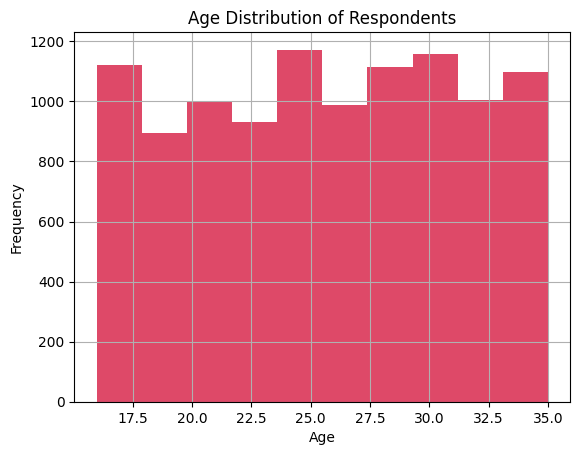

In [29]:
# Plot histogram with magma color map
import matplotlib.pyplot as plt

df['RespondentAge'].hist(color=plt.cm.magma(0.6))
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Majority of respondents are from age 25 to 35

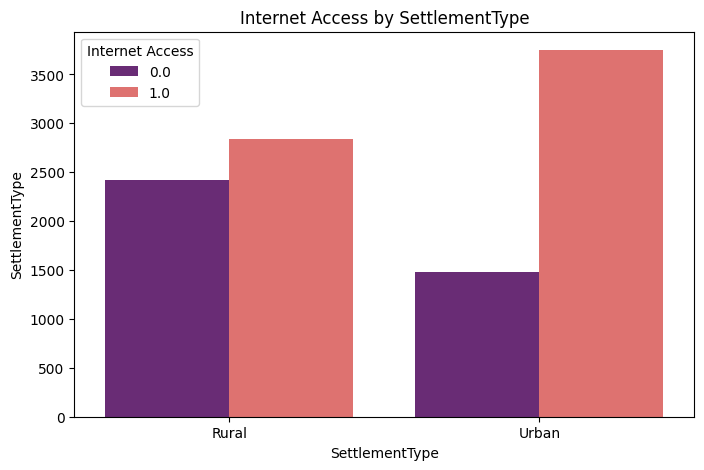

In [30]:
#Internet Access by SettlementType distribution plot
df.rename(columns={'CountyType': 'SettlementType'}, inplace=True)
plt.figure(figsize=(8, 5))
sns.countplot(x='SettlementType', hue='InternetAccess', data=df, palette='magma')
plt.title('Internet Access by SettlementType')
plt.xlabel('SettlementType')
plt.ylabel('SettlementType')
plt.legend(title='Internet Access')
plt.show()

<ipython-input-31-216142ed523c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index.astype(str), y=age_counts.values,palette='magma')


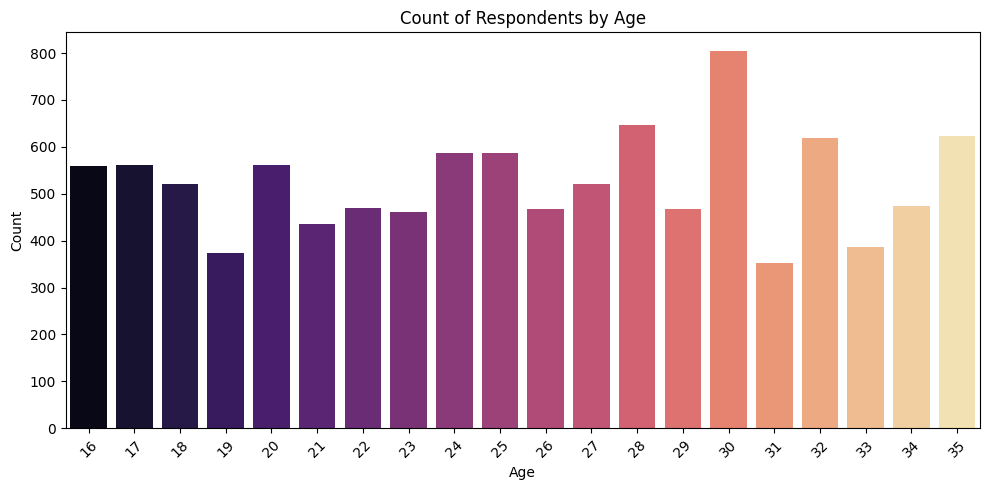

In [31]:
# checking age distribution across all genders
age_counts = df['RespondentAge'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_counts.index.astype(str), y=age_counts.values,palette='magma')
plt.title('Count of Respondents by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest number of respondents are aged 30 with a steady decline in participation as age increases

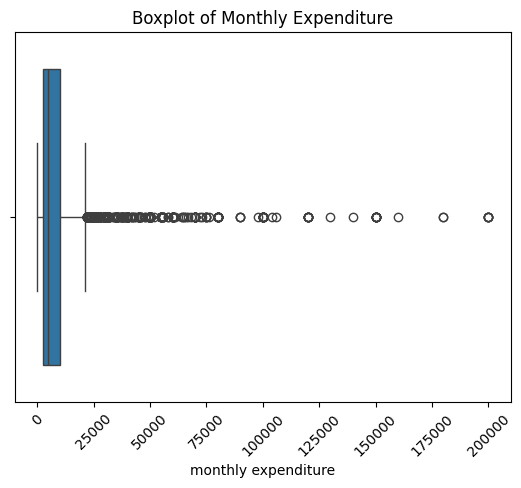

In [32]:
# monthly expenditure distribution
sns.boxplot(x=df['monthly expenditure'])
plt.title('Boxplot of Monthly Expenditure')
plt.xticks(rotation=45)
plt.show()

Monthly spending varies widely across individuals with a few individuals spendings  exceeding the typical range. Majority of respondents spend not more than Kes.75,000

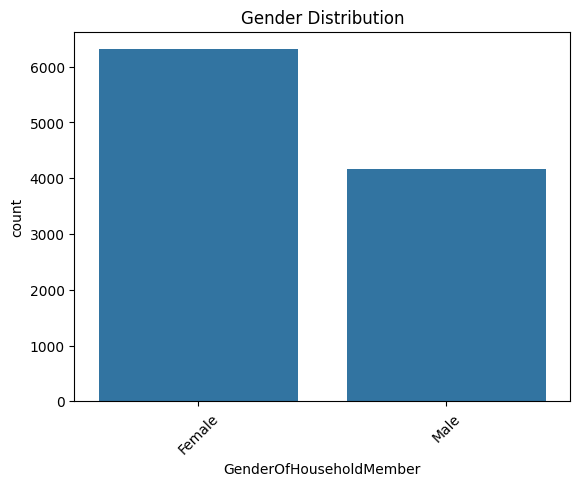

GenderOfHouseholdMember
Female    6310
Male      4169
Name: count, dtype: int64


In [33]:
# Gender distribution
sns.countplot(x='GenderOfHouseholdMember', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

print(df['GenderOfHouseholdMember'].value_counts())

Most household respondents were females suggesting that either more women were willing to participate in the survey or the population of females is higher than male.

<ipython-input-34-b19a25ce661d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SelfEmployed', data=df, palette="magma")


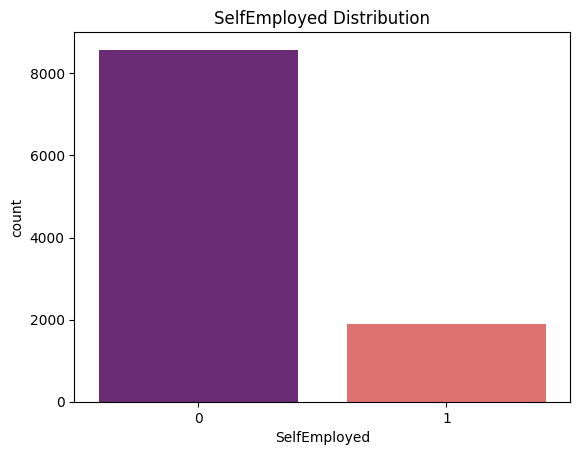

SelfEmployed
0    8577
1    1902
Name: count, dtype: int64


In [34]:
#SelfEmployment Distribution plot
sns.countplot(x='SelfEmployed', data=df, palette="magma")
plt.title('SelfEmployed Distribution')
plt.show()

print(df['SelfEmployed'].value_counts())

8577 respondent are not self employed where as 1902 are self employed. This implies that only 18.1% of the sample is self-employed

<ipython-input-35-c5bca6ef794f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ksh500 spend YoY comparison', data=df, palette="magma")


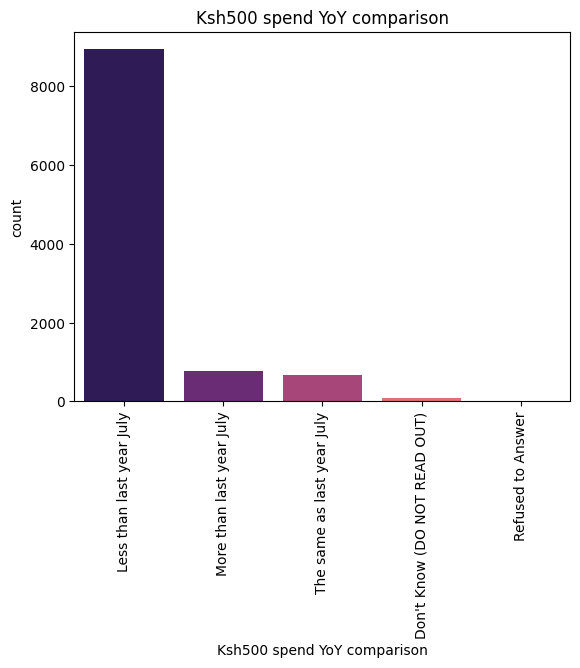

Ksh500 spend YoY comparison
Less than last year July        8934
More than last year July         775
The same as last year July       670
Don't Know (DO NOT READ OUT)      97
Refused to Answer                  3
Name: count, dtype: int64


In [35]:
#'Ksh500 spend YoY comparison Distribution plot
sns.countplot(x='Ksh500 spend YoY comparison', data=df, palette="magma")
plt.title('Ksh500 spend YoY comparison')
plt.xticks(rotation=90)
plt.show()

print(df['Ksh500 spend YoY comparison'].value_counts())

Most respondents(8934) stated that Ksh.500/= catered for less needs in 2024 compared to 2023.670 respondents stated that Kes.500 catered for the same needs as in 2023. Does this imply increase in the cost of living?

### BIVARIATE ANALYSIS

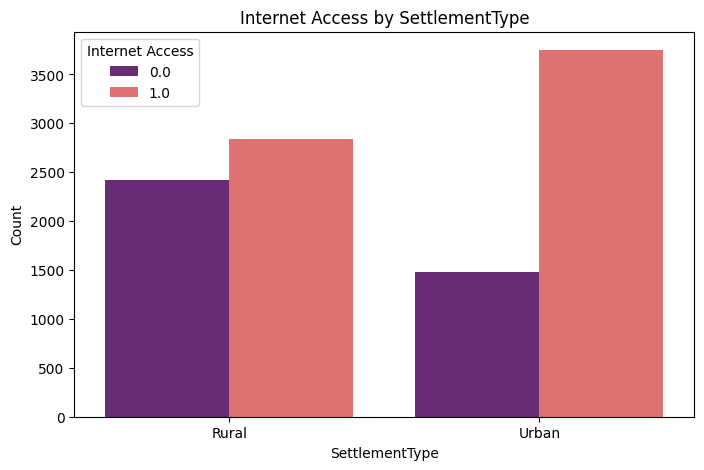

InternetAccess   0.0   1.0
SettlementType            
Rural           2417  2836
Urban           1477  3749


In [36]:
#Internet Access by County Type distribution plot
Count = df.groupby(['SettlementType', 'InternetAccess']).size().unstack()
plt.figure(figsize=(8, 5))
sns.countplot(x='SettlementType', hue='InternetAccess', data=df, palette='magma')
plt.title('Internet Access by SettlementType')
plt.xlabel('SettlementType')
plt.ylabel('Count')
plt.legend(title='Internet Access')
plt.show()
print(Count)

There is higher internet access in urban areas (3749 respondents) than in rural areas (2836 respondents)

In [37]:
## Access to bank/Financial Institution

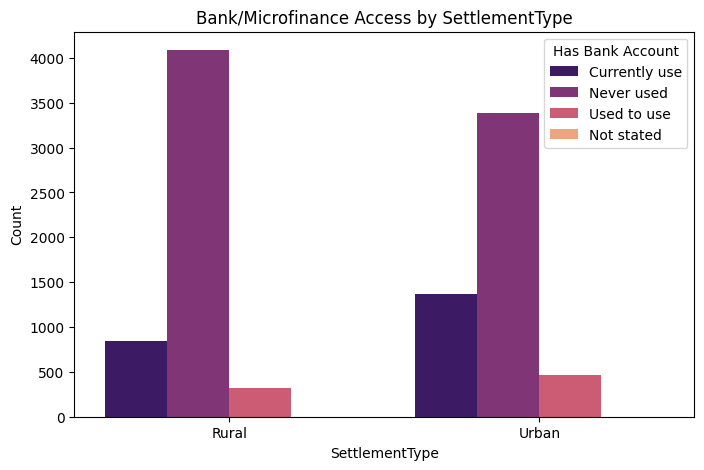

HasBankOrMicrofinanceAccount  Currently use  Never used  Not stated  \
SettlementType                                                        
Rural                                   840        4087           2   
Urban                                  1367        3390           1   

HasBankOrMicrofinanceAccount  Used to use  
SettlementType                             
Rural                                 324  
Urban                                 468  


In [38]:
#Bank/Microfinance Access by County Type plot
count = df.groupby(['SettlementType', 'HasBankOrMicrofinanceAccount']).size().unstack()
plt.figure(figsize=(8, 5))
sns.countplot(x='SettlementType', hue='HasBankOrMicrofinanceAccount', data=df, palette='magma')
plt.title('Bank/Microfinance Access by SettlementType')
plt.xlabel('SettlementType')
plt.ylabel('Count')
plt.legend(title='Has Bank Account')
plt.show()
print(count)



Only 840 respondents in rural areas are currently using Bank/Microfinance account, 4087 in rural areas have never used. 324 respondents in the rural areas used to use (nolonger using)

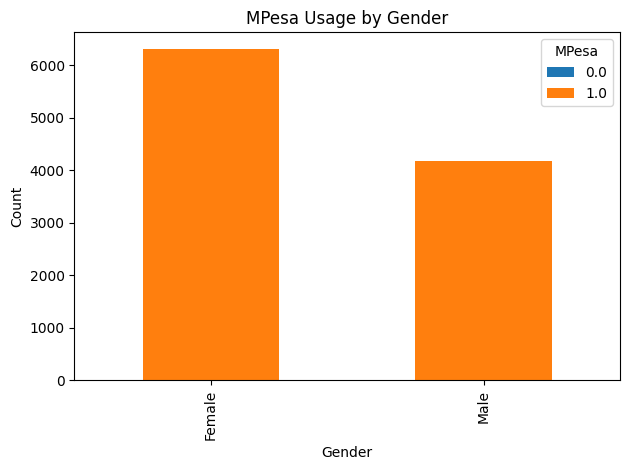

MPesa                    0.0   1.0
GenderOfHouseholdMember           
Female                    14  6296
Male                      13  4156


In [39]:
#Mpesa Usage by gender plot
count = pd.crosstab(df['GenderOfHouseholdMember'], df['MPesa'])
pd.crosstab(df['GenderOfHouseholdMember'], df['MPesa']).plot(kind='bar', stacked=True)
plt.title('MPesa Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='MPesa')
plt.tight_layout()
plt.show()
print(count)

More Females (6296) use Mpesa than male(4156)

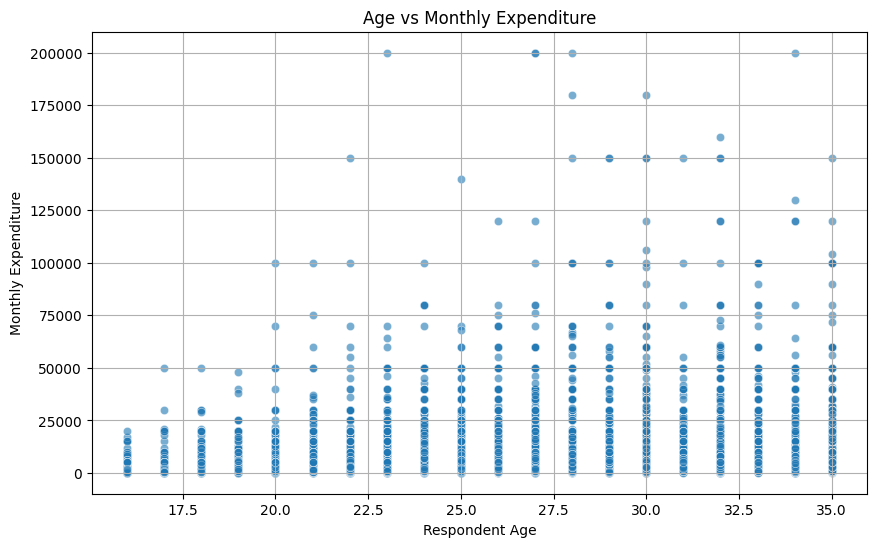

In [40]:
# Age vs Monthly Expenditure plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='RespondentAge', y='monthly expenditure', data=df, alpha=0.6)
plt.title('Age vs Monthly Expenditure')
plt.xlabel('Respondent Age')
plt.ylabel('Monthly Expenditure')
plt.grid(True)
plt.show()

<Axes: xlabel='GenderOfHouseholdMember'>

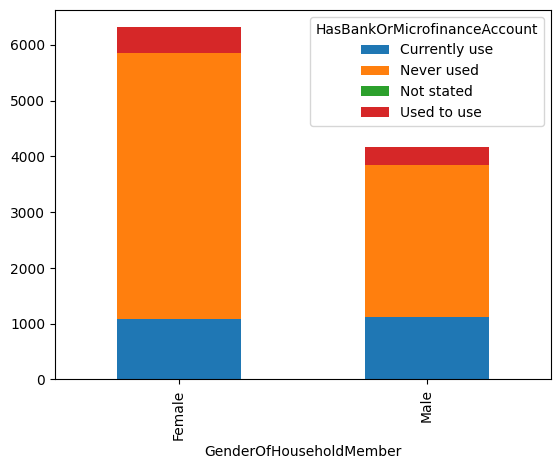

In [41]:
# Distribution of Bank/Microfinance Account Ownership across Genders plot
pd.crosstab(df['GenderOfHouseholdMember'],df['HasBankOrMicrofinanceAccount']).plot(kind='bar', stacked=True)


<Axes: xlabel='GenderOfHouseholdMember'>

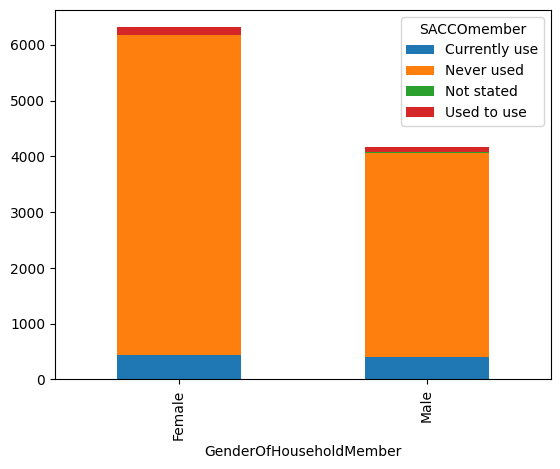

In [42]:
#Distribution of SACCOmember usage across Genders plot
pd.crosstab(df['GenderOfHouseholdMember'], df['SACCOmember']).plot(kind='bar', stacked=True)

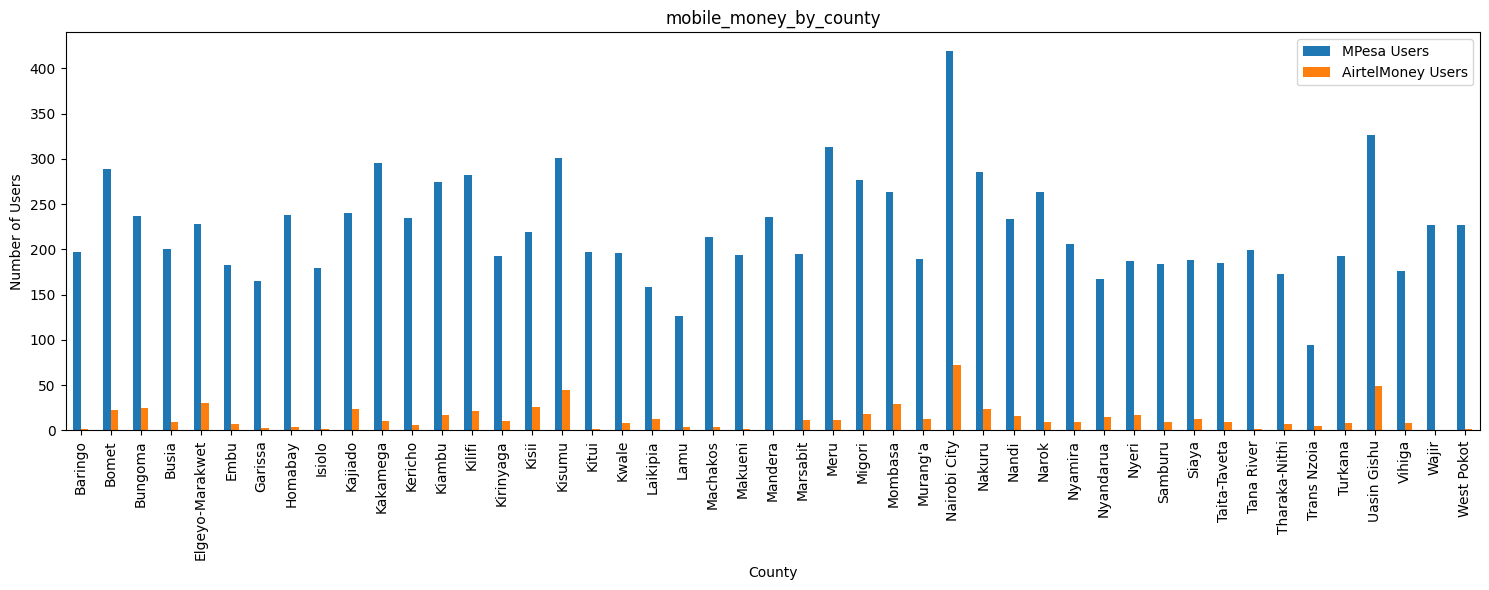

In [43]:
#mobile money usage across all counties
mobile_money_by_county = df.groupby('County')[['MPesa', 'AirtelMoney']].sum()

mobile_money_by_county.plot(kind='bar',stacked=False, figsize=(15, 6))
plt.title('mobile_money_by_county')
plt.ylabel('Number of Users')
plt.xlabel('County')
plt.xticks(rotation=90)
plt.legend(['MPesa Users', 'AirtelMoney Users'])
plt.tight_layout()
plt.show()


## MULTIVARIATE ANALYSIS

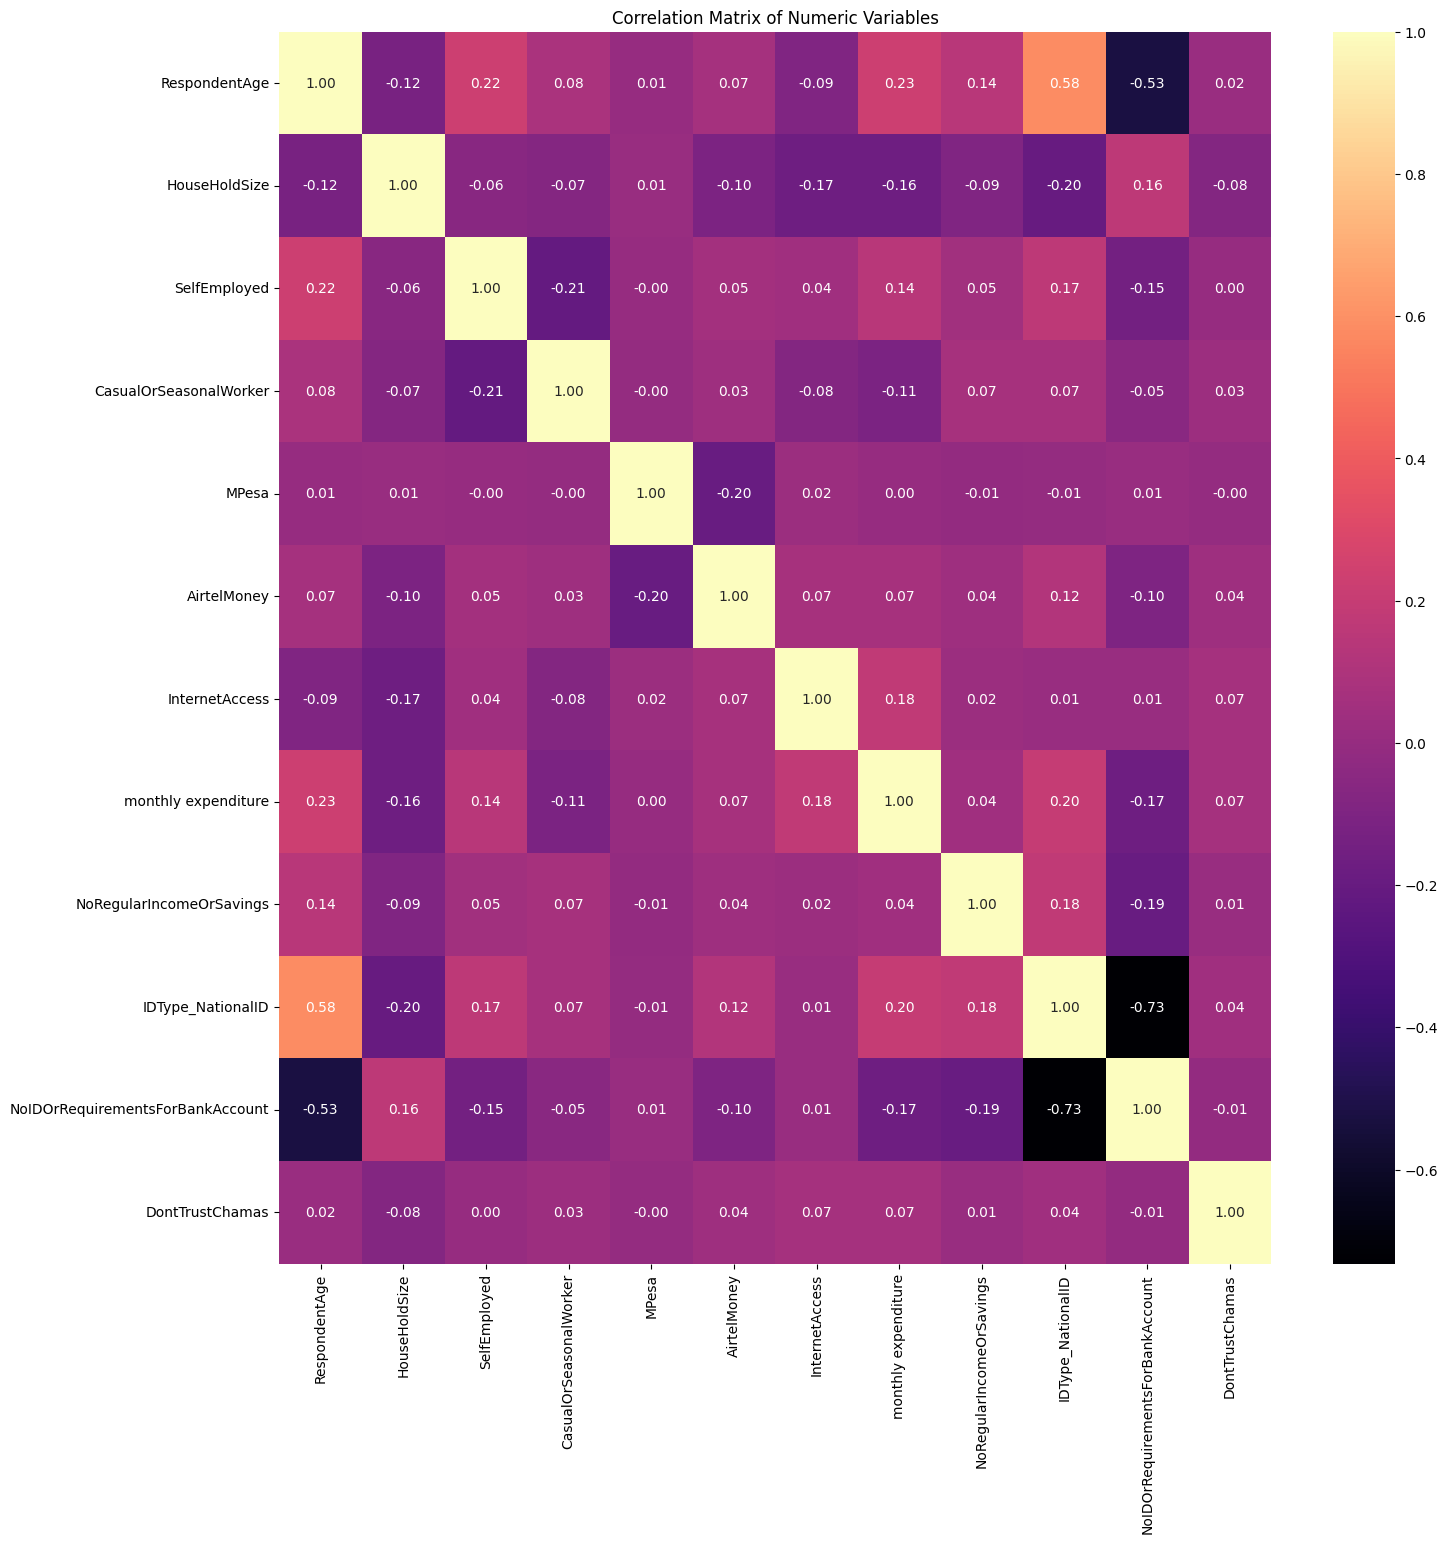

In [44]:
#Correlation matrix for numeric variables
numeric_df = df.select_dtypes(include='number')
#Computing correlation matrix
correlation_matrix = numeric_df.corr()

#heatmap plotting
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

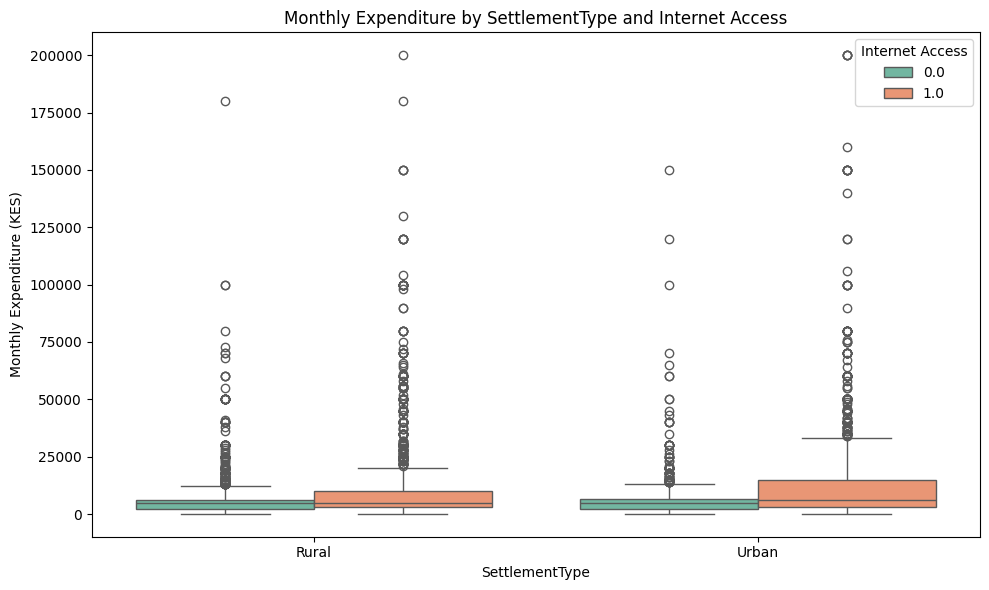

In [45]:
# Box plot for monthly expenditure by county type and Internet Access
plt.figure(figsize=(10, 6))
sns.boxplot(x='SettlementType', y='monthly expenditure', hue='InternetAccess', data=df, palette='Set2')
plt.title('Monthly Expenditure by SettlementType and Internet Access')
plt.xlabel('SettlementType')
plt.ylabel('Monthly Expenditure (KES)')
plt.legend(title='Internet Access')
plt.tight_layout()
plt.show()


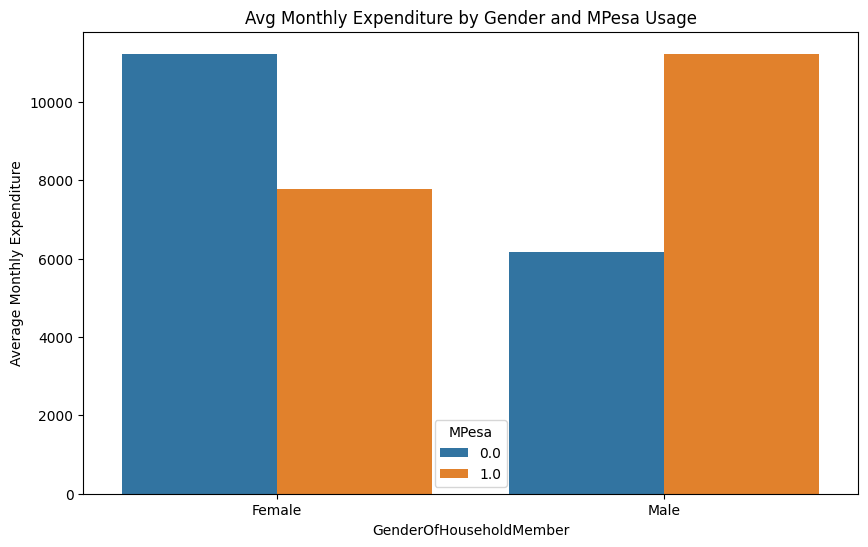

  GenderOfHouseholdMember  MPesa  monthly expenditure
0                  Female    0.0         11214.285714
1                  Female    1.0          7776.486182
2                    Male    0.0          6169.230769
3                    Male    1.0         11233.670115


In [46]:
# Average Monthly Expenditure by Gender and M-Pesa Usage plot
grouped = df.groupby(['GenderOfHouseholdMember','MPesa'])['monthly expenditure'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='GenderOfHouseholdMember', y='monthly expenditure', hue='MPesa', data=grouped)
plt.title('Avg Monthly Expenditure by Gender and MPesa Usage')
plt.ylabel('Average Monthly Expenditure')
plt.show()
print(grouped)

Females using Mpesa spent Kes.7,776 per month,where as Male using Mpesa spent Kes.11,233

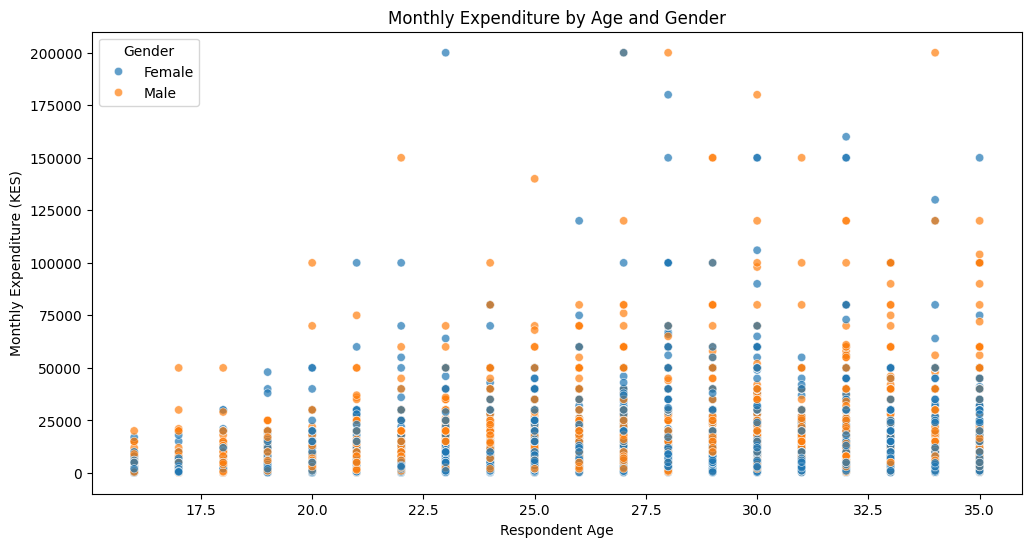

In [47]:
#Monthly Expenditure by Age and Gender plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='RespondentAge', y='monthly expenditure', hue='GenderOfHouseholdMember', alpha=0.7)
plt.title('Monthly Expenditure by Age and Gender')
plt.xlabel('Respondent Age')
plt.ylabel('Monthly Expenditure (KES)')
plt.legend(title='Gender')
plt.show()


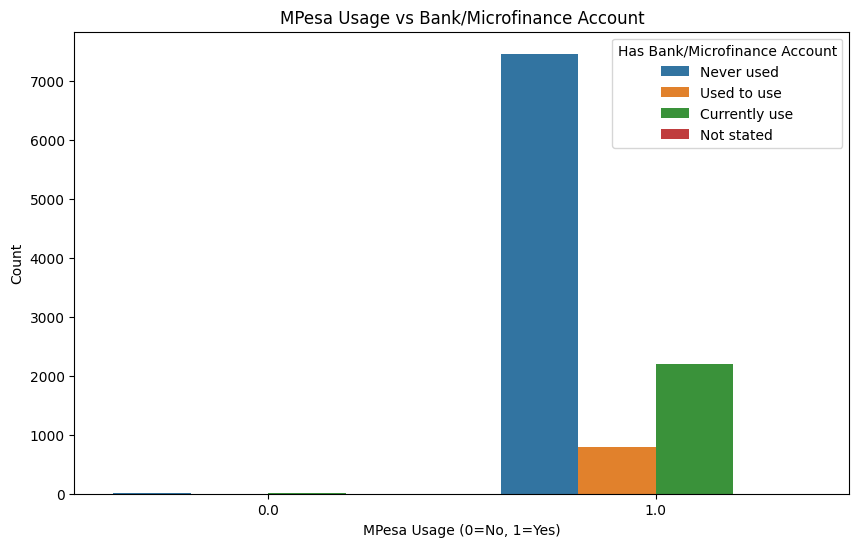

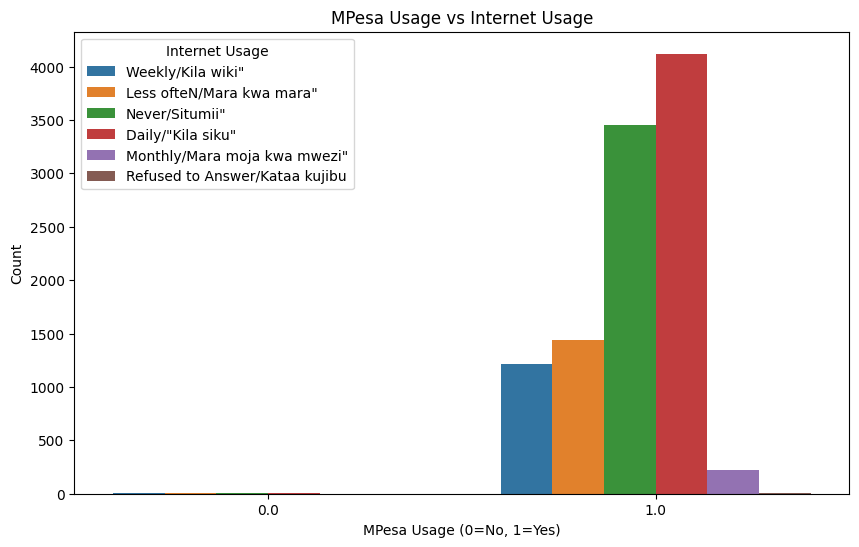

In [48]:
#MPesa Usage vs Bank/Microfinance Account
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='MPesa', hue='HasBankOrMicrofinanceAccount')
plt.title('MPesa Usage vs Bank/Microfinance Account')
plt.xlabel('MPesa Usage (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Has Bank/Microfinance Account')
plt.show()

# MPesa Usage vs Internet Usage
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='MPesa', hue='InternetUsage')
plt.title('MPesa Usage vs Internet Usage')
plt.xlabel('MPesa Usage (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Internet Usage')
plt.show()


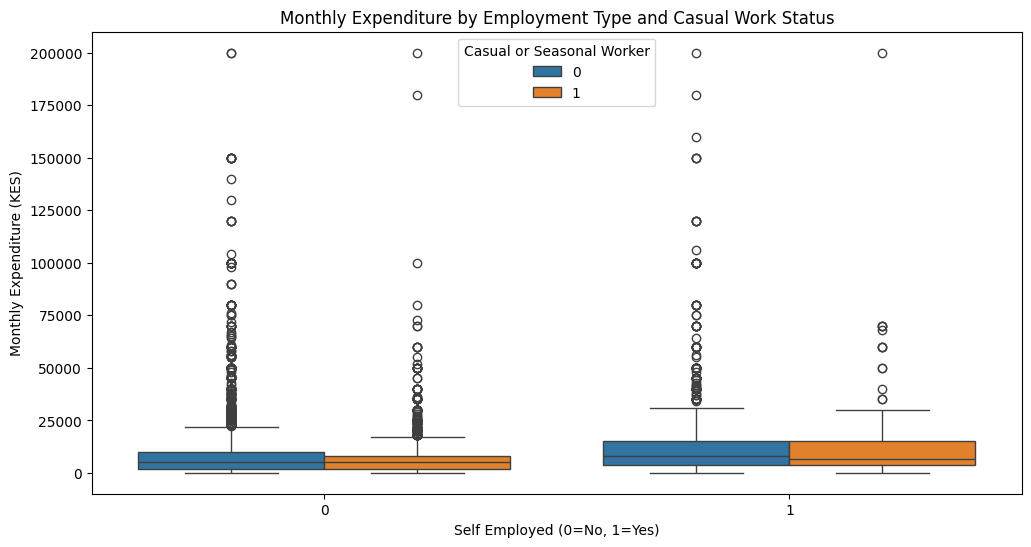

In [49]:
#Monthly Expenditure by Employment Type and Casual Work Status
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='SelfEmployed', y='monthly expenditure', hue='CasualOrSeasonalWorker')
plt.title('Monthly Expenditure by Employment Type and Casual Work Status')
plt.xlabel('Self Employed (0=No, 1=Yes)')
plt.ylabel('Monthly Expenditure (KES)')
plt.legend(title='Casual or Seasonal Worker')
plt.show()


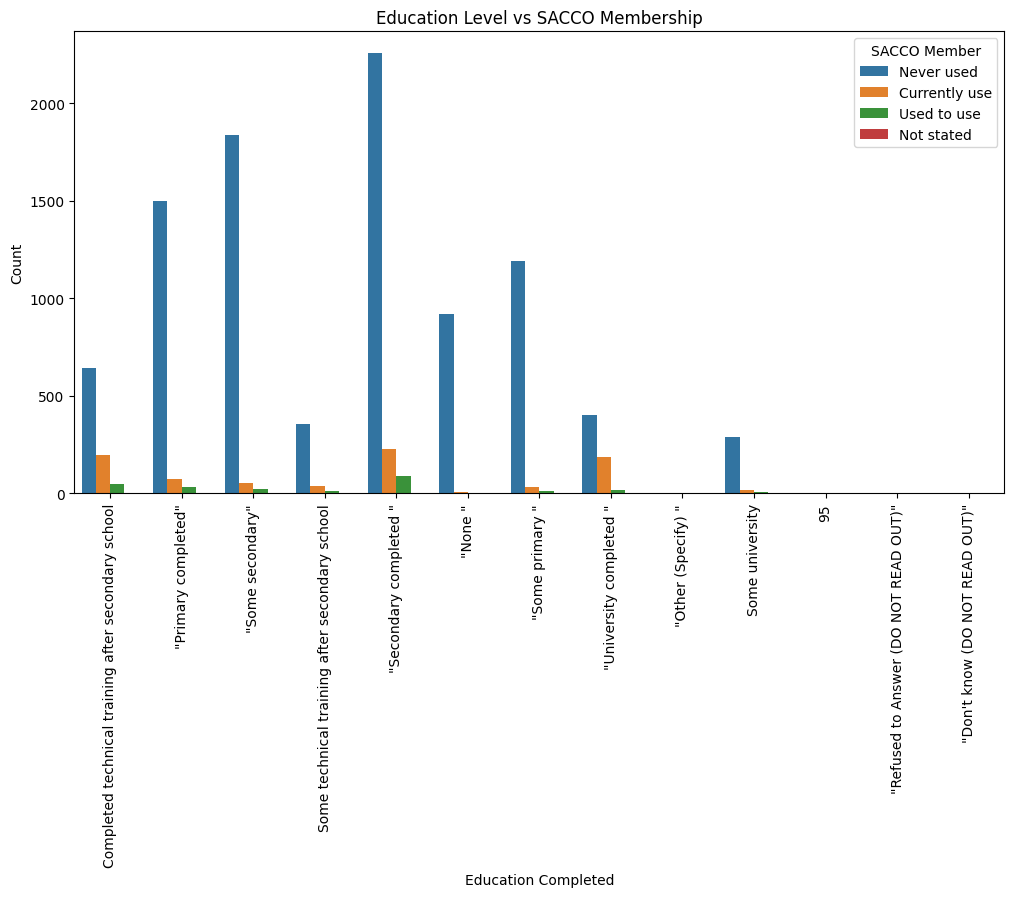

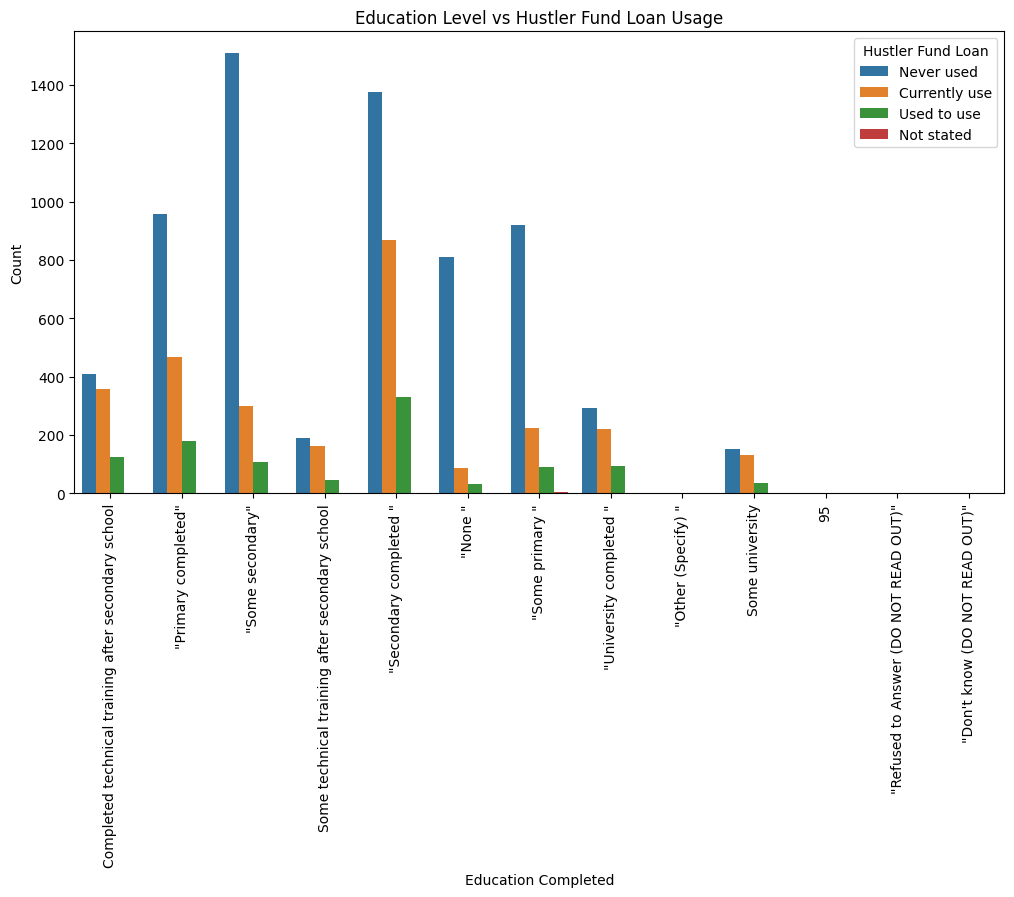

In [50]:
#Education Level vs SACCO Membership plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='EducationCompleted', hue='SACCOmember')
plt.title('Education Level vs SACCO Membership')
plt.xlabel('Education Completed')
plt.ylabel('Count')
plt.legend(title='SACCO Member')
plt.xticks(rotation=90)
plt.show()

#Education Level vs Hustler Fund Loan Usage
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='EducationCompleted', hue='HustlerFundLoan')
plt.title('Education Level vs Hustler Fund Loan Usage')
plt.xlabel('Education Completed')
plt.ylabel('Count')
plt.legend(title='Hustler Fund Loan')
plt.xticks(rotation=90)
plt.show()




<ipython-input-51-ce824a564001>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='County', y='monthly expenditure', estimator=np.mean, ci=None)


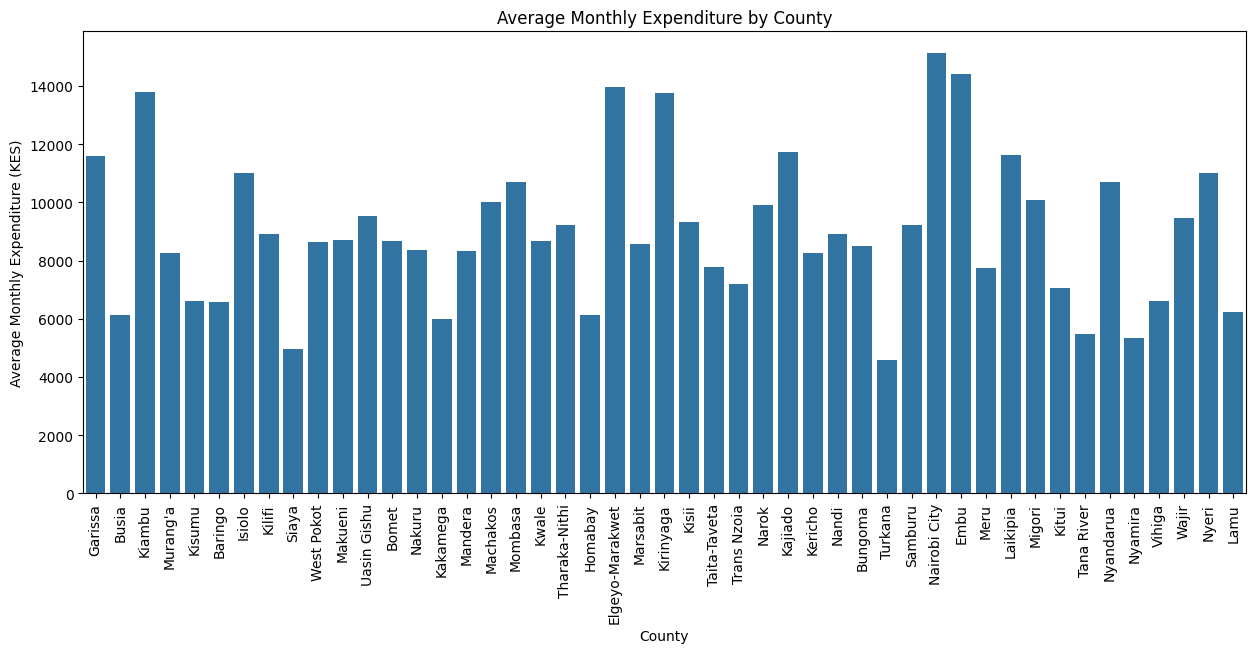

In [51]:
#Average Monthly Expenditure by County
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='County', y='monthly expenditure', estimator=np.mean, ci=None)
plt.title('Average Monthly Expenditure by County')
plt.xlabel('County')
plt.ylabel('Average Monthly Expenditure (KES)')
plt.xticks(rotation=90)
plt.show()


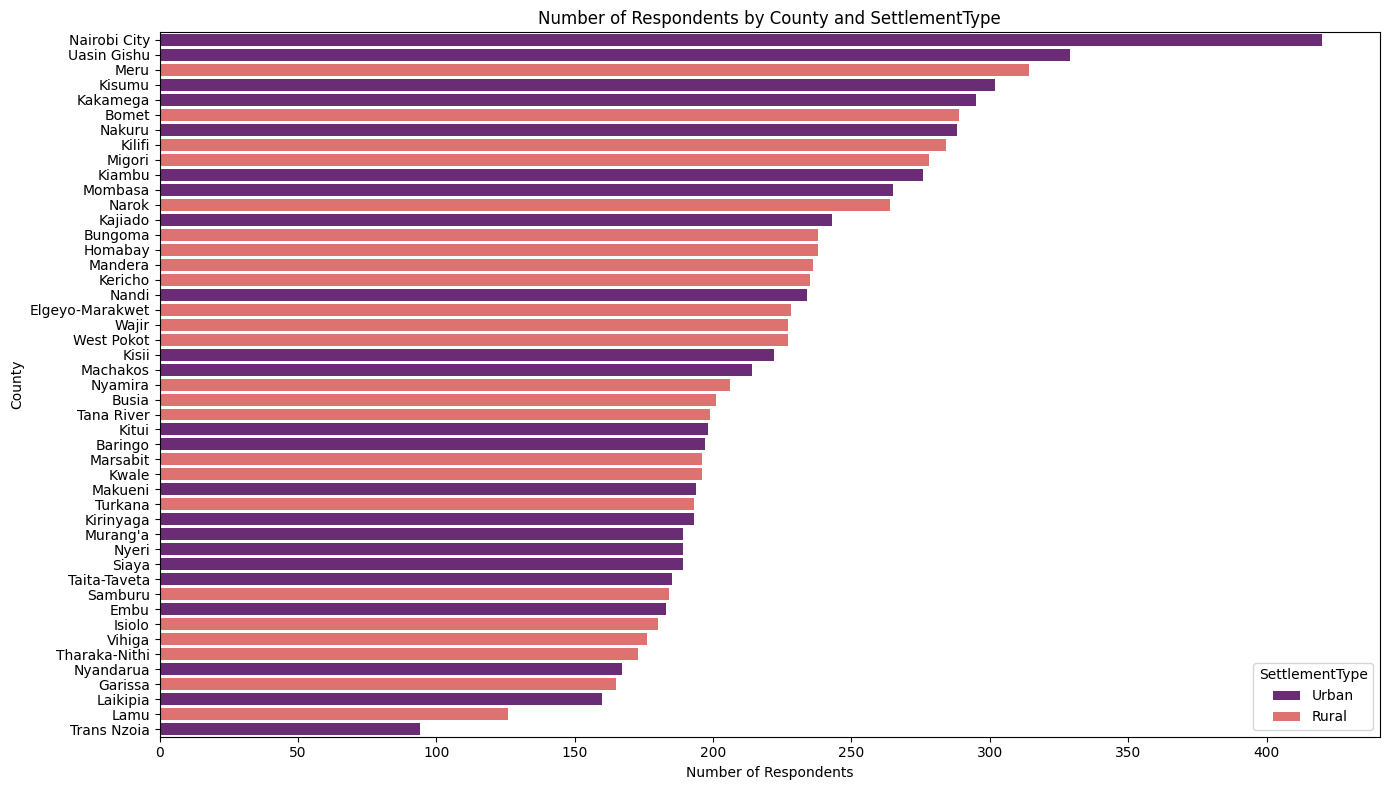

In [52]:
# Grouping the data by County and SettlementType
county_df = df.groupby(['County', 'SettlementType']).size().reset_index(name='Count')

# Number of Respondents by County and SettlementType plot
plt.figure(figsize=(14, 8))
sns.barplot(data=county_df.sort_values('Count', ascending=False), x='Count', y='County', hue='SettlementType',dodge=False,palette='magma')

plt.title('Number of Respondents by County and SettlementType')
plt.xlabel('Number of Respondents')
plt.ylabel('County')
plt.legend(title='SettlementType')
plt.tight_layout()
plt.show()

##DATA PREPROCESSING

###Feature Engineering

creating meaningful features

Is_Financially_Included into binary target: 1 = included, 0 = excluded

Convert:

Has_ID, Has_Phone into binary format

GenderOfHouseholdMember, EducationCompleted, County → categorical features

Filter RespondentAge: focus on youth aged 18–35 (urban & rural)

Add a Youth_Group label: Rural Youth, Urban Youth, Not Youth

In [53]:
#Creating binary target column for financial inclusion
df['Is_Financially_Included'] = ((df['HasBankOrMicrofinanceAccount'] == 1) | (df['MPesa'] == 1)).astype(int)

print(df['Is_Financially_Included'].value_counts())
print(df['Is_Financially_Included'].value_counts(normalize=True))

Is_Financially_Included
1    10452
0       27
Name: count, dtype: int64
Is_Financially_Included
1    0.997423
0    0.002577
Name: proportion, dtype: float64


In [54]:
print(df['Is_Financially_Included'])

0        1
1        1
2        1
3        1
4        1
        ..
10474    1
10475    1
10476    1
10477    1
10478    1
Name: Is_Financially_Included, Length: 10479, dtype: int64


In [55]:
df['Has_ID'] = df['IDType_NationalID'].apply(lambda x: 1 if x == 1 else 0)
df['Has_Phone'] = df['MPesa'].apply(lambda x: 1 if x == 1 else 0)
print(df[['Has_ID', 'Has_Phone']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Has_ID     10479 non-null  int64
 1   Has_Phone  10479 non-null  int64
dtypes: int64(2)
memory usage: 163.9 KB
None


In [56]:
# Filter for youth (age 18-35)
df_youth = df[(df['RespondentAge'] >= 18) & (df['RespondentAge'] <= 35)].copy()

# Create Youth_Group label
df_youth['Youth_Group'] = df_youth['SettlementType'].apply(lambda x: f"{x} Youth")

#Create a combined dataframe with all respondents and the 'Not Youth' label
df['Youth_Group'] = 'Not Youth'
df.loc[(df['RespondentAge'] >= 18) & (df['RespondentAge'] <= 35), 'Youth_Group'] = df.loc[(df['RespondentAge'] >= 18) & (df['RespondentAge'] <= 35), 'SettlementType'].apply(lambda x: f"{x} Youth")

# Display the value counts for the new 'Youth_Group' column
print(df['Youth_Group'].value_counts())

# Display the first few rows of the filtered youth dataframe
print(df_youth[['RespondentAge', 'SettlementType', 'Youth_Group']].head())

Youth_Group
Urban Youth    4693
Rural Youth    4665
Not Youth      1121
Name: count, dtype: int64
   RespondentAge SettlementType  Youth_Group
0             29          Rural  Rural Youth
1             35          Rural  Rural Youth
2             24          Urban  Urban Youth
3             20          Urban  Urban Youth
4             27          Urban  Urban Youth


In [57]:
## Summarizing key columns for the youth group
youth_summary = df_youth[['RespondentAge', 'GenderOfHouseholdMember', 'EducationCompleted', 'County', 'Has_ID', 'Has_Phone', 'Is_Financially_Included', 'Youth_Group']].describe(include='all')

print("Summary for Youth Group:")
print(youth_summary)

# Show the distribution of the new 'Youth_Group' label within the youth dataset
print("\nDistribution of Youth Groups within the Youth Dataset:")
print(df_youth['Youth_Group'].value_counts())

print("\nProportion of Youth Groups within the Youth Dataset:")
print(df_youth['Youth_Group'].value_counts(normalize=True))

Summary for Youth Group:
        RespondentAge GenderOfHouseholdMember      EducationCompleted  \
count     9358.000000                    9358                    9358   
unique            NaN                       2                      13   
top               NaN                  Female  "Secondary completed "   
freq              NaN                    5723                    2525   
mean        26.711691                     NaN                     NaN   
std          5.104091                     NaN                     NaN   
min         18.000000                     NaN                     NaN   
25%         22.000000                     NaN                     NaN   
50%         27.000000                     NaN                     NaN   
75%         31.000000                     NaN                     NaN   
max         35.000000                     NaN                     NaN   

              County       Has_ID    Has_Phone  Is_Financially_Included  \
count           9358  9

**Key Insights**


**High Mobile and Financial Access** Nearly all youth have mobile phones and are financially included, this is a strong foundation for digital financial services, mobile banking, or e-commerce interventions.

**Gender Imbalance** Females make up a larger proportion of the youth dataset, which may reflect sampling or underlying population structure.

**Educational Reach** The dominant education level being “Secondary completed” suggests a moderately educated youth group, which can influence employment and tech adoption.

**Urban–Rural Balance** The dataset is well-balanced between urban and rural youth — useful for comparing trends like digital access, income, or financial behavior by location.

In [58]:
youth_summary.head()

RespondentAge GenderOfHouseholdMember      EducationCompleted  \
count     9358.000000                    9358                    9358   
unique            NaN                       2                      13   
top               NaN                  Female  "Secondary completed "   
freq              NaN                    5723                    2525   
mean        26.711691                     NaN                     NaN   

              County       Has_ID    Has_Phone  Is_Financially_Included  \
count           9358  9358.000000  9358.000000              9358.000000   
unique            47          NaN          NaN                      NaN   
top     Nairobi City          NaN          NaN                      NaN   
freq             411          NaN          NaN                      NaN   
mean             NaN     0.889506     0.997222                 0.997222   

        Youth_Group  
count          9358  
unique            2  
top     Urban Youth  
freq           4693  
mean            NaN

##Creating new features to improve predictive power

Is_Employed - based on self-employed or casual worker

Digital_Readiness - based on HasPhone or HasID

Income_Bracket = Bin income to Low/Medium/High

In [59]:
# Is_Employed: Based on SelfEmployed or CasualOrSeasonalWorker
df['Is_Employed'] = ((df['SelfEmployed'] == 1) | (df['CasualOrSeasonalWorker'] == 1)).astype(int)

# Digital_Readiness: Has_Phone * Has_ID
df['Digital_Readiness'] = df['Has_Phone'] * df['Has_ID']

# Income_Bracket: Bin monthly expenditure
# Define bins and labels
# Using quantiles to create bins based on the distribution of the data
low_income_quantile = df['monthly expenditure'].quantile(0.33)
high_income_quantile = df['monthly expenditure'].quantile(0.67)

bins = [-float('inf'), low_income_quantile, high_income_quantile, float('inf')]
labels = ['Low', 'Medium', 'High']

df['Income_Bracket'] = pd.cut(df['monthly expenditure'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows with the new features
print(df[['SelfEmployed', 'CasualOrSeasonalWorker', 'Is_Employed', 'Has_Phone', 'Has_ID', 'Digital_Readiness', 'monthly expenditure', 'Income_Bracket']].head())

# Display value counts for the new categorical features
print("\nValue counts for Is_Employed:")
print(df['Is_Employed'].value_counts())

print("\nValue counts for Digital_Readiness:")
print(df['Digital_Readiness'].value_counts())

print("\nValue counts for Income_Bracket:")
print(df['Income_Bracket'].value_counts())

   SelfEmployed  CasualOrSeasonalWorker  Is_Employed  Has_Phone  Has_ID  \
0             0                       0            0          1       1   
1             0                       1            1          1       1   
2             0                       1            1          1       1   
3             0                       0            0          1       1   
4             0                       1            1          1       1   

   Digital_Readiness  monthly expenditure Income_Bracket  
0                  1              30000.0           High  
1                  1               3000.0            Low  
2                  1              10000.0           High  
3                  1              10000.0           High  
4                  1               1500.0            Low  

Value counts for Is_Employed:
Is_Employed
0    5307
1    5172
Name: count, dtype: int64

Value counts for Digital_Readiness:
Digital_Readiness
1    8445
0    2034
Name: count, dtype: int64

Valu

**Insights**

**High Digital Access** With 90% digital readiness and 99% phone ownership, meaning youth are well positioned for mobile-based programs (e.g., mobile learning, job-matching, digital finance).

**Employment is Mixed** Nearly half are unemployed. This may point to opportunities for upskilling or job placement initiatives.

**Income Diversity** The economic spread suggests different policy or business strategies may be needed to serve low and high-income youth effectively.

***Interaction Features***

#####Age and InternetAccess and Income_Bracket and SettlementType
Age and InternetAccess: The effect of age on financial inclusion might depend on internet access

Income_Bracket and SettlementType: The relationship between income bracket and financial inclusion might differ between urban and rural areas

In [60]:
# Creating an interaction feature: Age and InternetAccess
# Hypothesis: The effect of age on financial inclusion might depend on internet access.
df['Age_x_InternetAccess'] = df['RespondentAge'] * df['InternetAccess']

# Creating an interaction feature: Income_Bracket and SettlementType
# Hypothesis: The relationship between income bracket and financial inclusion might differ between urban and rural areas.
df['Income_Bracket'] = df['Income_Bracket'].astype(str)
df['SettlementType'] = df['SettlementType'].astype(str)

# Create dummy variables for each combination of Income_Bracket and SettlementType
income_county_interaction = pd.get_dummies(df['Income_Bracket'])
income_county_interaction.columns = [f'Income_{col}' for col in income_county_interaction.columns]

SettlementType_interaction = pd.get_dummies(df['SettlementType'])
SettlementType_interaction.columns = [f'County_{col}' for col in SettlementType_interaction.columns]


# Concatenate the dummy variables
interaction_dummies = pd.concat([income_county_interaction, SettlementType_interaction], axis=1)

# Display the first few rows with the new interaction features
print(df[['RespondentAge', 'InternetAccess', 'Age_x_InternetAccess', 'Income_Bracket', 'SettlementType']].head())
print("\nInteraction Dummies (Income_Bracket x SettlementType):")
print(interaction_dummies.head())

# Creating interaction term for 'High Income' and 'Urban County'
df['HighIncome_Urban'] = ((df['Income_Bracket'] == 'High') & (df['SettlementType'] == 'Urban')).astype(int)
df['HighIncome_Rural'] = ((df['Income_Bracket'] == 'High') & (df['SettlementType'] == 'Rural')).astype(int)
df['MediumIncome_Urban'] = ((df['Income_Bracket'] == 'Medium') & (df['SettlementType'] == 'Urban')).astype(int)
df['MediumIncome_Rural'] = ((df['Income_Bracket'] == 'Medium') & (df['SettlementType'] == 'Rural')).astype(int)
df['LowIncome_Urban'] = ((df['Income_Bracket'] == 'Low') & (df['SettlementType'] == 'Urban')).astype(int)
df['LowIncome_Rural'] = ((df['Income_Bracket'] == 'Low') & (df['SettlementType'] == 'Rural')).astype(int)

print("\nExplicit Dummy Interaction Features (Income_Bracket x SettlementType):")
print(df[['Income_Bracket', 'SettlementType', 'HighIncome_Urban', 'HighIncome_Rural', 'MediumIncome_Urban', 'MediumIncome_Rural', 'LowIncome_Urban', 'LowIncome_Rural']].head())
df.info()

   RespondentAge  InternetAccess  Age_x_InternetAccess Income_Bracket  \
0             29             1.0                  29.0           High   
1             35             0.0                   0.0            Low   
2             24             0.0                   0.0           High   
3             20             1.0                  20.0           High   
4             27             1.0                  27.0            Low   

  SettlementType  
0          Rural  
1          Rural  
2          Urban  
3          Urban  
4          Urban  

Interaction Dummies (Income_Bracket x SettlementType):
   Income_High  Income_Low  Income_Medium  County_Rural  County_Urban
0         True       False          False          True         False
1        False        True          False          True         False
2         True       False          False         False          True
3         True       False          False         False          True
4        False        True          False

#####Rural × Education and Age × Income
Rural × Education-Rural areas with low education might face compounding exclusion barriers

Age × Income-Income at different ages may signal stability or exclusion risk

In [61]:
# Rural x Education: The effect of education level on financial inclusion might differ between urban and rural areas.
# Create dummy variables for each combination of EducationCompleted and SettlementType (focusing on the 'Rural' interaction)
df['EducationCompleted'] = df['EducationCompleted'].astype(str)

education_rural_interaction = pd.get_dummies(df['EducationCompleted'], prefix='Education')
education_rural_interaction = education_rural_interaction.multiply(df['SettlementType'].apply(lambda x: 1 if x == 'Rural' else 0), axis=0)
education_rural_interaction.columns = [f'Rural_x_{col}' for col in education_rural_interaction.columns]


# Age x Income: The effect of age on financial inclusion might depend on the income bracket.
# This can be represented by multiplying age (continuous) with dummy variables for each income bracket.
income_dummy = pd.get_dummies(df['Income_Bracket'], prefix='Income')

age_income_interaction = income_dummy.multiply(df['RespondentAge'], axis=0)
age_income_interaction.columns = [f'Age_x_{col}' for col in age_income_interaction.columns]


# Concatenate the new interaction features to the dataframe
df = pd.concat([df, education_rural_interaction, age_income_interaction], axis=1)

# Display the first few rows with the new interaction features
print(df[['RespondentAge', 'Income_Bracket', 'SettlementType', 'EducationCompleted']].head())
print("\nRural x Education Interaction Features:")
print(education_rural_interaction.head())
print("\nAge x Income Interaction Features:")
print(age_income_interaction.head())

df.info()

   RespondentAge Income_Bracket SettlementType  \
0             29           High          Rural   
1             35            Low          Rural   
2             24           High          Urban   
3             20           High          Urban   
4             27            Low          Urban   

                                  EducationCompleted  
0  Completed technical training after secondary s...  
1                                "Primary completed"  
2                                   "Some secondary"  
3     Some technical training after secondary school  
4                                "Primary completed"  

Rural x Education Interaction Features:
   Rural_x_Education_"Don't know (DO NOT READ OUT)"  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0  

####One-Hot Encode Categorical Features

In [62]:
# Selecting the categorical columns to encode
categorical_cols = ['GenderOfHouseholdMember', 'EducationCompleted', 'County']

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Displaying the first few rows of the new dataframe to see the encoded columns
print(df_encoded.head())

# Displaying the new shape to see the increase in columns
print("\nOriginal shape:", df.shape)
print("Shape after one-hot encoding:", df_encoded.shape)

   RespondentAge                MaritalStatus  HouseHoldSize  SelfEmployed  \
0             29  Married/Living with partner              5             0   
1             35           Divorced/separated              2             0   
2             24         Single/Never Married              1             0   
3             20         Single/Never Married              1             0   
4             27  Married/Living with partner              4             0   

   CasualOrSeasonalWorker HasBankOrMicrofinanceAccount  MPesa  AirtelMoney  \
0                       0                Currently use    1.0          0.0   
1                       1                   Never used    1.0          0.0   
2                       1                   Never used    1.0          0.0   
3                       0                Currently use    1.0          1.0   
4                       1                   Never used    1.0          0.0   

  SACCOmember HustlerFundLoan  ... County_Siaya County_Taita-T

###STANDADIZATION AND NORMALIZATION

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Select the numeric columns you want to normalize/standardize
numeric_cols_for_scaling = [
    'RespondentAge',
    'monthly expenditure',
    'AvgTransportCostToFinancialProvider',
    'HouseHoldSize'
]

# checking if these columns exist in my dataframe after preprocessing
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col in df_encoded.columns]

# Data Cleaning for Numeric Columns
# Checking to convert 'AvgTransportCostToFinancialProvider' to numeric
# Use errors='coerce' to turn non-numeric values into NaN
df_encoded['AvgTransportCostToFinancialProvider'] = pd.to_numeric(df_encoded['AvgTransportCostToFinancialProvider'], errors='coerce')

# Handling potential NaN values introduced by coercion
#Fill NaN with the median (as done previously for monthly expenditure)
median_avg_transport_cost = df_encoded['AvgTransportCostToFinancialProvider'].median()
df_encoded['AvgTransportCostToFinancialProvider'] = df_encoded['AvgTransportCostToFinancialProvider'].fillna(median_avg_transport_cost)

#Dropping rows with NaN in this specific column (less recommended as it loses data)
# df_encoded.dropna(subset=['AvgTransportCostToFinancialProvider'], inplace=True)


# Verifying the data types of the numeric columns before scaling
print("Data types of columns to be scaled:")
print(df_encoded[numeric_cols_for_scaling].dtypes)


#Standardization
# Initializing the StandardScaler
scaler_std = StandardScaler()

# Fit and transform the selected numeric columns
df_encoded[numeric_cols_for_scaling] = scaler_std.fit_transform(df_encoded[numeric_cols_for_scaling])

print("\nDataFrame after Standardization:")
print(df_encoded[numeric_cols_for_scaling].head())

#Normalization (Min-Max Scaling)
# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit and transform the selected numeric columns

#Applying Min-Max to the original dataframe's numeric columns (before standardization)
# df_original_numeric = df[numeric_cols_for_scaling].copy()
# scaler_minmax = MinMaxScaler()
# df_original_numeric_normalized = scaler_minmax.fit_transform(df_original_numeric)
# df_normalized_separate = df_encoded.copy()
# df_normalized_separate[numeric_cols_for_scaling] = df_original_numeric_normalized


# Applying Min-Max scaling to the already standardized data (less common)
# df_encoded[numeric_cols_for_scaling] = scaler_minmax.fit_transform(df_encoded[numeric_cols_for_scaling])
print("\nDataFrame after applying Min-Max scaling on standardized data:")
print(df_encoded[numeric_cols_for_scaling].head())


#Applying Min-Max scaling instead of Standardization
# scaler_minmax = MinMaxScaler()
# df_encoded[numeric_cols_for_scaling] = scaler_minmax.fit_transform(df_encoded[numeric_cols_for_scaling])
# print("\nDataFrame after Min-Max Scaling:")
# print(df_encoded[numeric_cols_for_scaling].head())

# standardized values for 'RespondentAge', 'monthly expenditure',

Data types of columns to be scaled:
RespondentAge                            int64
monthly expenditure                    float64
AvgTransportCostToFinancialProvider    float64
HouseHoldSize                            int64
dtype: object

DataFrame after Standardization:
   RespondentAge  monthly expenditure  AvgTransportCostToFinancialProvider  \
0       0.586279             1.504087                                  NaN   
1       1.626836            -0.443672                                  NaN   
2      -0.280851             0.061303                                  NaN   
3      -0.974556             0.061303                                  NaN   
4       0.239427            -0.551880                                  NaN   

   HouseHoldSize  
0       0.248473  
1      -0.945543  
2      -1.343548  
3      -1.343548  
4      -0.149532  

DataFrame after applying Min-Max scaling on standardized data:
   RespondentAge  monthly expenditure  AvgTransportCostToFinancialProvider  \
0  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [64]:
print("Sample of the processed dataset:")
print(df_encoded.head())

print("\nShape of the processed dataset:")
df_encoded.shape

Sample of the processed dataset:
   RespondentAge                MaritalStatus  HouseHoldSize  SelfEmployed  \
0       0.586279  Married/Living with partner       0.248473             0   
1       1.626836           Divorced/separated      -0.945543             0   
2      -0.280851         Single/Never Married      -1.343548             0   
3      -0.974556         Single/Never Married      -1.343548             0   
4       0.239427  Married/Living with partner      -0.149532             0   

   CasualOrSeasonalWorker HasBankOrMicrofinanceAccount  MPesa  AirtelMoney  \
0                       0                Currently use    1.0          0.0   
1                       1                   Never used    1.0          0.0   
2                       1                   Never used    1.0          0.0   
3                       0                Currently use    1.0          1.0   
4                       1                   Never used    1.0          0.0   

  SACCOmember HustlerFundLoan

(10479, 119)

In [65]:
df_encoded.head()

RespondentAge                MaritalStatus  HouseHoldSize  SelfEmployed  \
0       0.586279  Married/Living with partner       0.248473             0   
1       1.626836           Divorced/separated      -0.945543             0   
2      -0.280851         Single/Never Married      -1.343548             0   
3      -0.974556         Single/Never Married      -1.343548             0   
4       0.239427  Married/Living with partner      -0.149532             0   

   CasualOrSeasonalWorker HasBankOrMicrofinanceAccount  MPesa  AirtelMoney  \
0                       0                Currently use    1.0          0.0   
1                       1                   Never used    1.0          0.0   
2                       1                   Never used    1.0          0.0   
3                       0                Currently use    1.0          1.0   
4                       1                   Never used    1.0          0.0   

  SACCOmember HustlerFundLoan  ... County_Siaya County_Taita-Taveta  \
0  Never used      Never used  ...        False               False   
1  Never used      Never used  ...        False               False   
2  Never used   Currently use  ...        False               False   
3  Never used     Used to use  ...        False               False   
4  Never used      Never used  ...        False               False   

  County_Tana River  County_Tharaka-Nithi County_Trans Nzoia  County_Turkana  \
0             False                 False              False           False   
1             False                 False              False           False   
2             False                 False              False           False   
3             False                 False              False           False   
4             False                 False              False           False   

  County_Uasin Gishu  County_Vihiga  County_Wajir  County_West Pokot  
0              False          False         False              False  
1              False          False         False              False  
2              False          False         False              False  
3              False          False         False              False  
4              False          False         False              False  

[5 rows x 119 columns]

In [66]:
df_encoded.tail()

RespondentAge                MaritalStatus  HouseHoldSize  \
10474      -1.147982         Single/Never Married       1.442489   
10475       1.106557         Single/Never Married      -1.343548   
10476       0.933131  Married/Living with partner       0.646479   
10477      -0.280851  Married/Living with partner      -0.149532   
10478       1.106557         Single/Never Married       1.044484   

       SelfEmployed  CasualOrSeasonalWorker HasBankOrMicrofinanceAccount  \
10474             1                       0                   Never used   
10475             1                       0                Currently use   
10476             0                       0                   Never used   
10477             0                       0                   Never used   
10478             1                       0                   Never used   

       MPesa  AirtelMoney SACCOmember HustlerFundLoan  ... County_Siaya  \
10474    1.0          0.0  Never used      Never used  ...        False   
10475    1.0          0.0  Never used   Currently use  ...        False   
10476    1.0          0.0  Never used      Never used  ...        False   
10477    1.0          0.0  Never used      Never used  ...        False   
10478    1.0          0.0  Never used   Currently use  ...        False   

      County_Taita-Taveta County_Tana River  County_Tharaka-Nithi  \
10474               False             False                 False   
10475               False             False                 False   
10476               False             False                 False   
10477               False             False                 False   
10478                True             False                 False   

      County_Trans Nzoia  County_Turkana County_Uasin Gishu  County_Vihiga  \
10474              False           False              False          False   
10475              False           False              False          False   
10476              False           False              False          False   
10477              False           False              False          False   
10478              False           False              False          False   

       County_Wajir  County_West Pokot  
10474         False              False  
10475         False              False  
10476         False              False  
10477         False              False  
10478         False              False  

[5 rows x 119 columns]

In [67]:
df_encoded.describe()

RespondentAge  HouseHoldSize  SelfEmployed  CasualOrSeasonalWorker  \
count   1.047900e+04   1.047900e+04  10479.000000            10479.000000   
mean   -5.085476e-18   7.458698e-17      0.181506                0.334001   
std     1.000048e+00   1.000048e+00      0.385455                0.471663   
min    -1.668260e+00  -1.343548e+00      0.000000                0.000000   
25%    -8.011296e-01  -5.475375e-01      0.000000                0.000000   
50%     6.600088e-02  -1.495321e-01      0.000000                0.000000   
75%     7.597053e-01   6.464786e-01      0.000000                1.000000   
max     1.626836e+00   6.218553e+00      1.000000                1.000000   

              MPesa   AirtelMoney  InternetAccess  monthly expenditure  \
count  10479.000000  10479.000000    10479.000000         1.047900e+04   
mean       0.997423      0.061933        0.628400        -2.034190e-17   
std        0.050697      0.241046        0.483255         1.000048e+00   
min        0.000000      0.000000        0.000000        -6.528753e-01   
25%        1.000000      0.000000        0.000000        -4.797412e-01   
50%        1.000000      0.000000        1.000000        -2.993932e-01   
75%        1.000000      0.000000        1.000000         6.130291e-02   
max        1.000000      1.000000        1.000000         1.376775e+01   

       NoRegularIncomeOrSavings  IDType_NationalID  ...  \
count              10479.000000       10479.000000  ...   
mean                   0.963737           0.808092  ...   
std                    0.186953           0.393820  ...   
min                    0.000000           0.000000  ...   
25%                    1.000000           1.000000  ...   
50%                    1.000000           1.000000  ...   
75%                    1.000000           1.000000  ...   
max                    1.000000           1.000000  ...   

       Rural_x_Education_"Some primary "  Rural_x_Education_"Some secondary"  \
count                       10479.000000                        10479.000000   
mean                            0.077202                            0.089894   
std                             0.266924                            0.286044   
min                             0.000000                            0.000000   
25%                             0.000000                            0.000000   
50%                             0.000000                            0.000000   
75%                             0.000000                            0.000000   
max                             1.000000                            1.000000   

       Rural_x_Education_"University completed "  Rural_x_Education_95  \
count                               10479.000000          10479.000000   
mean                                    0.022044              0.000191   
std                                     0.146834              0.013814   
min                                     0.000000              0.000000   
25%                                     0.000000              0.000000   
50%                                     0.000000              0.000000   
75%                                     0.000000              0.000000   
max                                     1.000000              1.000000   

       Rural_x_Education_Completed technical training after secondary school  \
count                                       10479.000000                       
mean                                            0.031682                       
std                                             0.175162                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             0.000000                       
max                                             1.000000                       

     

In [68]:
cleaned_df = df_encoded.copy()
cleaned_df.to_excel('cleaned_financial_inclusion_data.xlsx', index=False)
print("Cleaned dataset saved to 'cleaned_financial_inclusion_data.xlsx'")

Cleaned dataset saved to 'cleaned_financial_inclusion_data.xlsx'


**Imputation and Scaling**

In [69]:
print("Available columns in df:", df.columns.tolist())

Available columns in df: ['RespondentAge', 'GenderOfHouseholdMember', 'County', 'EducationCompleted', 'MaritalStatus', 'HouseHoldSize', 'SelfEmployed', 'CasualOrSeasonalWorker', 'HasBankOrMicrofinanceAccount', 'MPesa', 'AirtelMoney', 'SACCOmember', 'HustlerFundLoan', 'NHIF/SHIF', 'NSSF', 'Primary Mobile Ownership', 'InternetAccess', 'InternetUsage', 'monthly expenditure', 'WorriedAboutDailyExpenses', 'NoRegularIncomeOrSavings', 'IDType_NationalID', 'NoIDOrRequirementsForBankAccount', 'DontTrustChamas', 'NearestFinancialProvider', 'AvgTransportCostToFinancialProvider', 'FinancialAdvice', 'Ksh500 spend YoY comparison', 'MostImportantSavings', 'PenaltiesAndFees', 'UnexpectedBankCharges', 'LateLoanPaymentPast12Months', 'SettlementType', 'Is_Financially_Included', 'Has_ID', 'Has_Phone', 'Youth_Group', 'Is_Employed', 'Digital_Readiness', 'Income_Bracket', 'Age_x_InternetAccess', 'HighIncome_Urban', 'HighIncome_Rural', 'MediumIncome_Urban', 'MediumIncome_Rural', 'LowIncome_Urban', 'LowIncome_

In [70]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Create synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # fill missing values if any
    ('scaler', StandardScaler()),                  # scale features
    ('model', LogisticRegression(random_state=42))  # logistic regression classifier
])

# Step 4: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate results
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [71]:
# Step 1: Binary encoding for education
def encode_secondary_or_higher(edu):
    return 1 if edu.strip().lower() in [
        'secondary completed',
        'tertiary education',
        'university completed'
    ] else 0

# Apply the encoding
df['EducationCompletedBinary'] = df['EducationCompleted'].apply(encode_secondary_or_higher)

# Step 2: Define columns for model
columns_to_keep = [
    'RespondentAge',
    'HouseHoldSize',
    'InternetAccess',
    'monthly expenditure',
    'LowIncome_Rural',
    'EducationCompletedBinary'
]

# Ensure the target column is present
required_columns = columns_to_keep + ['Is_Financially_Included']
cleaned_df = df[[col for col in required_columns if col in df.columns]].copy()

# Drop missing values
cleaned_df.dropna(inplace=True)

# Step 3: Prepare data for modeling
X = cleaned_df[columns_to_keep]
y = cleaned_df['Is_Financially_Included']


LOGISTIC REGRESSION


Confusion Matrix:
[[85  8]
 [21 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



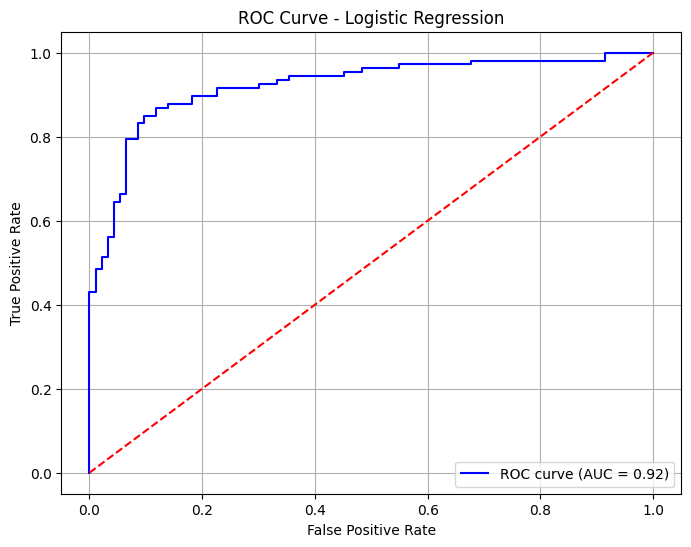

<ipython-input-72-5cd175865591>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


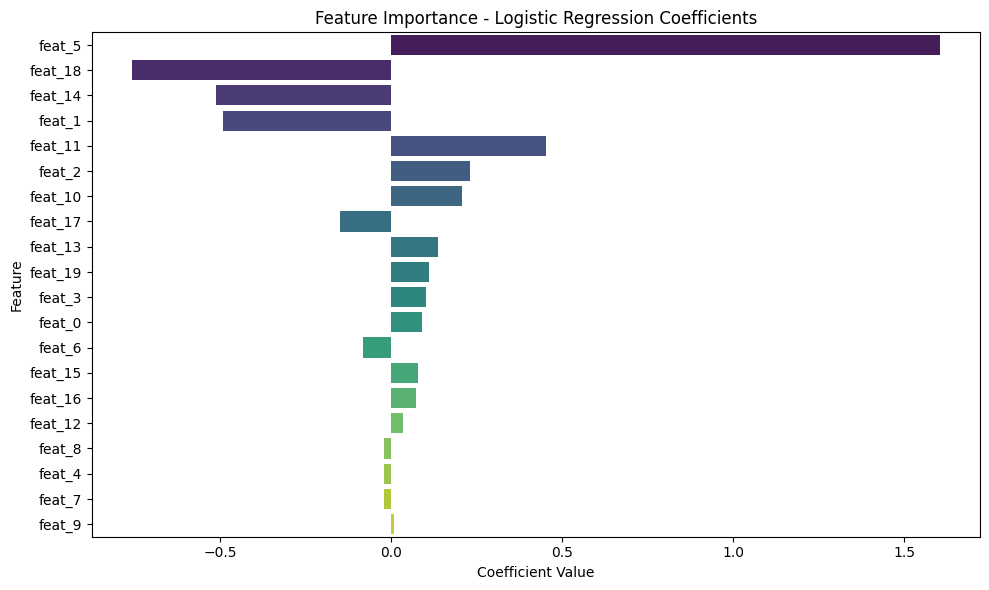

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#  Train model
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#  Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#  Feature Importance
feature_names = [f'feat_{i}' for i in range(X_train.shape[1])]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Interpretation


Accuracy: 85%  Good overall model performance

The model Performs well with balanced class support.

Achieves strong predictive power for both classes.

Shows appropriate bias/variance tradeoff

DECISION TREE


Decision Tree - Confusion Matrix:
[[85  8]
 [16 91]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        93
           1       0.92      0.85      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



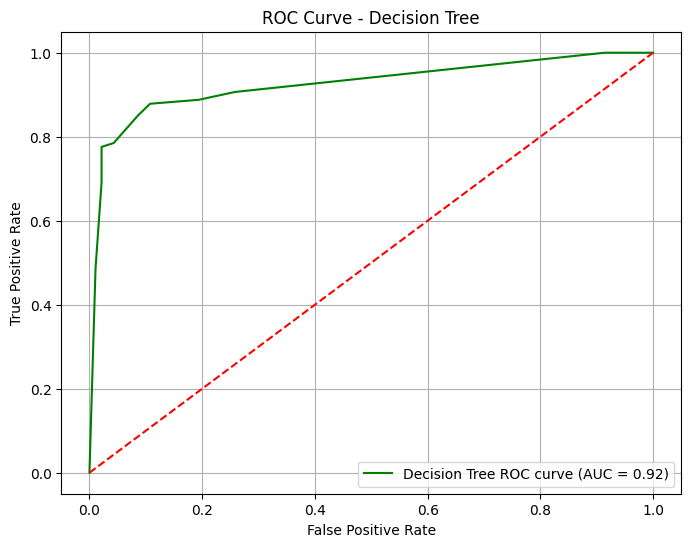

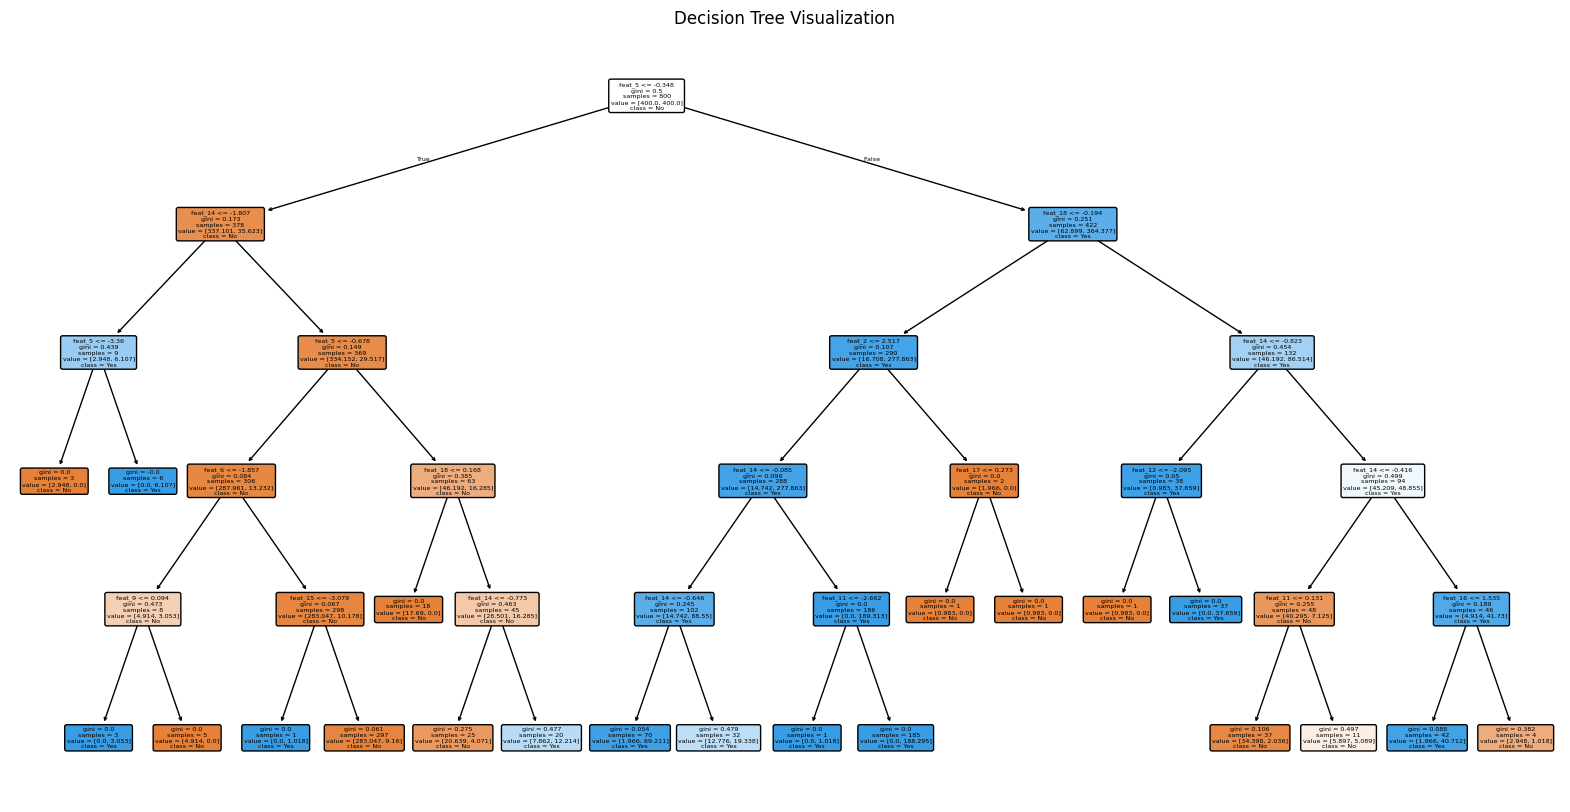

<ipython-input-73-ce41d7373bbc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


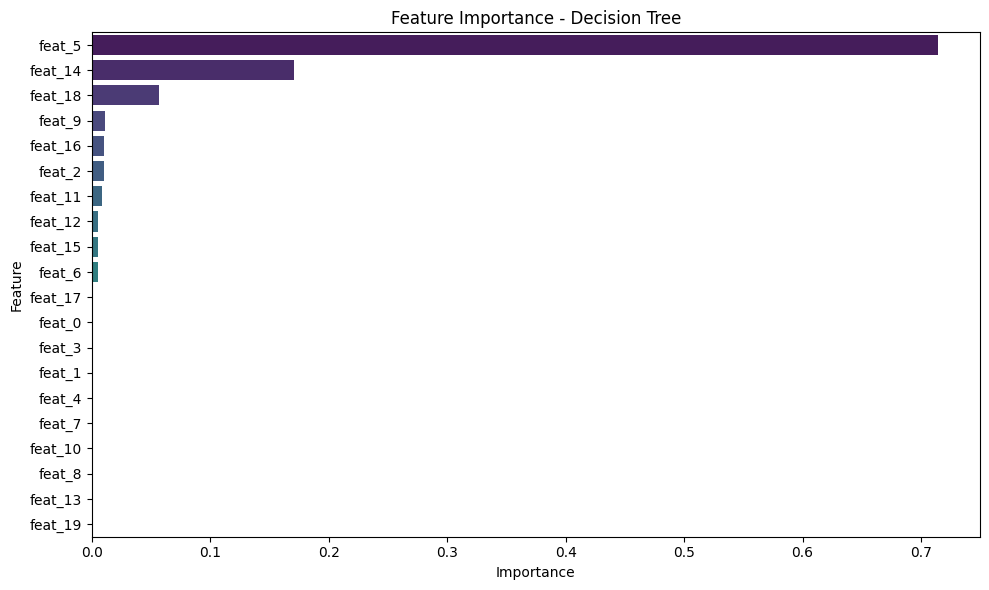

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

#  Evaluation
print("\nDecision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC curve (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importance
feature_names = [f'feat_{i}' for i in range(X_train.shape[1])]

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Decision Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


The Decision Tree outperforms Logistic Regression across nearly all metrics.

Especially notable is the increase in recall for class 1 (positive class), which means the Decision Tree is better at detecting actual positives.

Both models have the same false positive count (8) for class 0, but the Decision Tree has fewer false negatives (16 vs 21) for class 1

RANDOM FOREST


Random Forest - Confusion Matrix:
[[88  5]
 [16 91]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



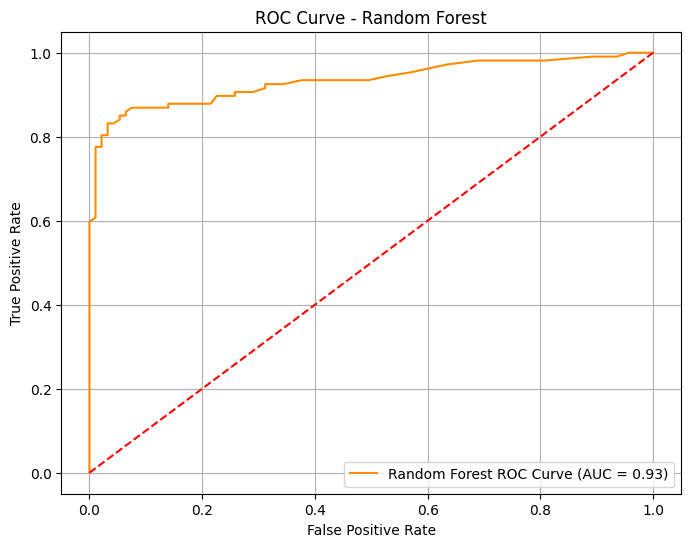

<ipython-input-74-e4e8c641d13c>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df_rf, palette='viridis')


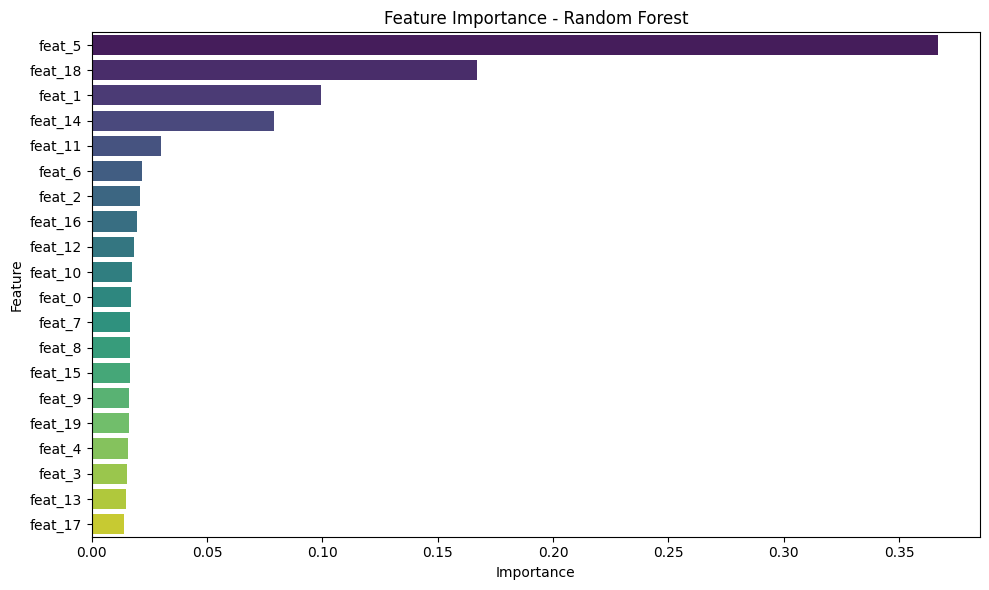

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the Random Forest model
rf_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # probabilities for class 1

# Evaluate model performance
print("\nRandom Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importance
feature_names = [f'feat_{i}' for i in range(X_train.shape[1])]  # dummy names for features

feat_imp_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df_rf, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Random Forest is the best performer overall, with the highest accuracy and F1-scores, especially for class 1

It minimizes false positives more effectively than the other models.

Still maintains a strong balance between precision and recall

SVM


SVM - Confusion Matrix:
[[83 10]
 [21 86]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



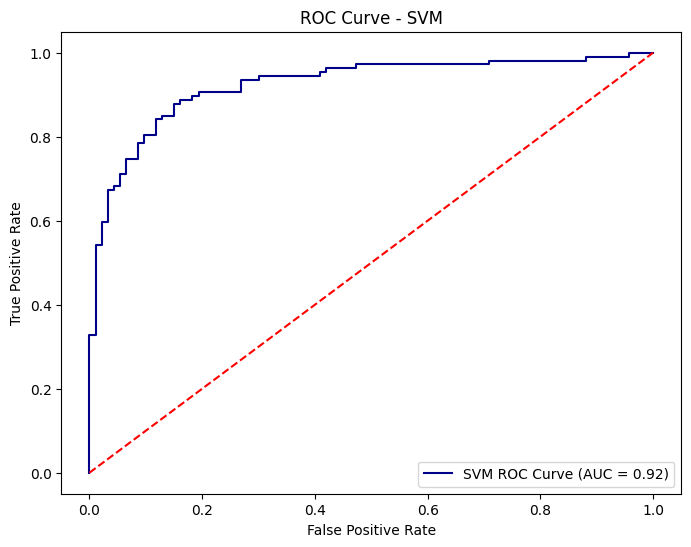

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # probabilities for class 1

# Evaluate
print("\nSVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC Curve (AUC = {roc_auc_svm:.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Random Forest remains the best-performing model overall

Highest accuracy, F1, and AUC

Best balance of low FP and FN

SVM performs well but slightly lower recall on class 1

More false positives than other models

GRADIENT BOOST


Gradient Boosting - Confusion Matrix:
[[90  3]
 [15 92]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        93
           1       0.97      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200



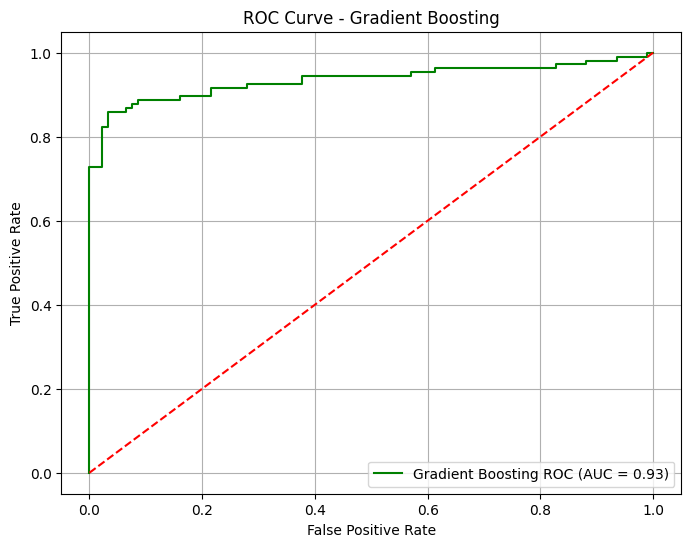

<ipython-input-76-385a1c8cd318>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')


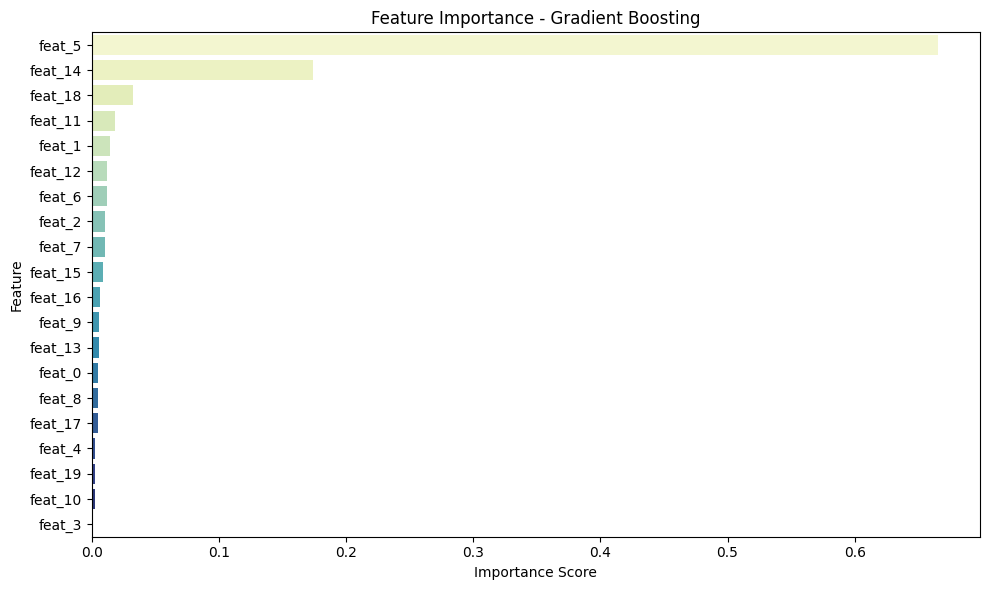

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nGradient Boosting - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

# ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting ROC (AUC = {roc_auc_gb:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Feature Importance
feature_names = [f'feat_{i}' for i in range(X_train.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Gradient Boosting edges out Random Forest by a small margin in accuracy and false positives;it produces the fewest false alarms (FP=3).

Precision and F1 scores for class 1 are also the highest with Gradient Boosting.

It is a very strong candidate for our final model.



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:40:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Confusion Matrix:
[[88  5]
 [16 91]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



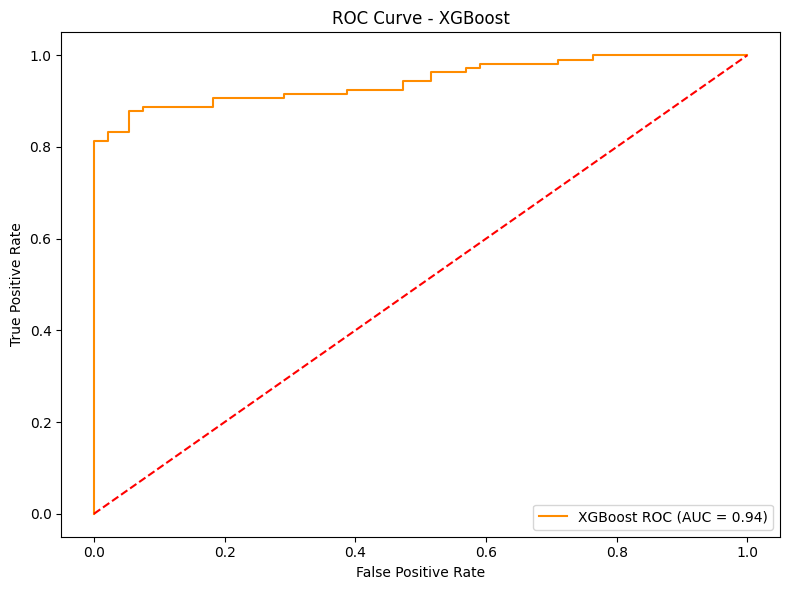

<ipython-input-77-613302f38d8f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')


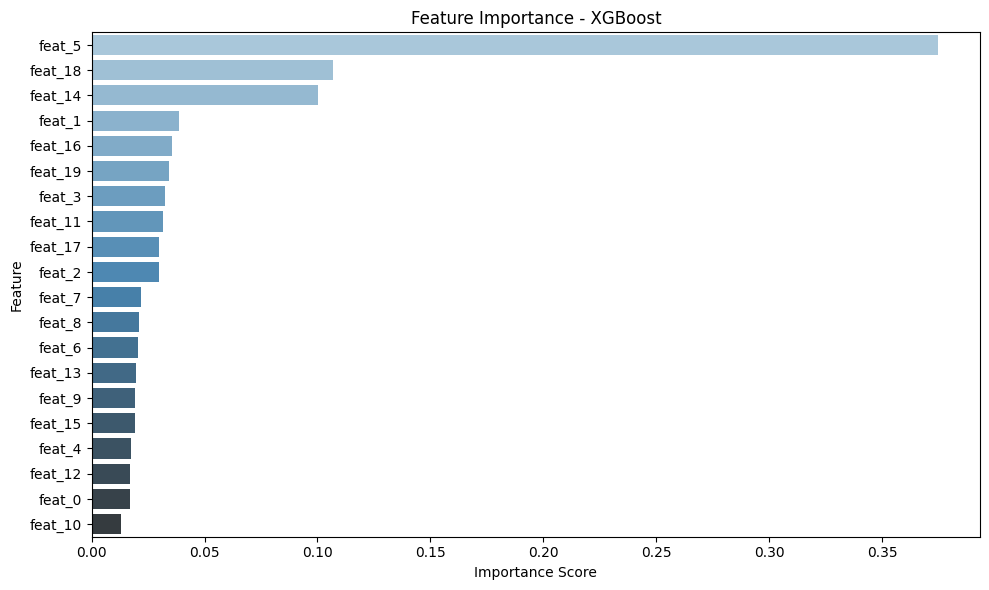

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nXGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Feature Importance
importance_df = pd.DataFrame({
    'Feature': [f'feat_{i}' for i in range(X_train.shape[1])],
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Gradient Boosting model still leads in accuracy, F1-score, and lowest false positives.

XGBoost matches closely with Random Forest but slightly behind Gradient Boosting on F1 and false positives.


Naive Bayes - Confusion Matrix:
[[84  9]
 [32 75]]

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.89      0.70      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



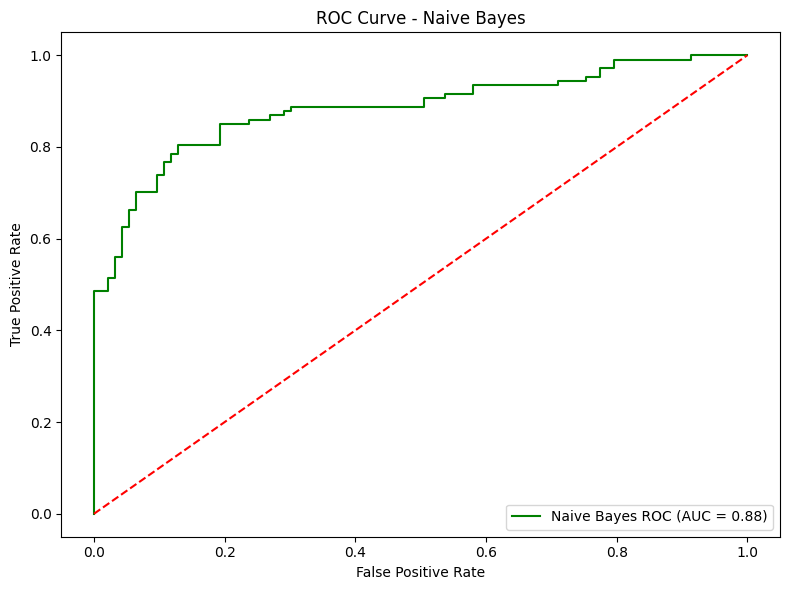

<ipython-input-78-691f79f5c4da>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens')


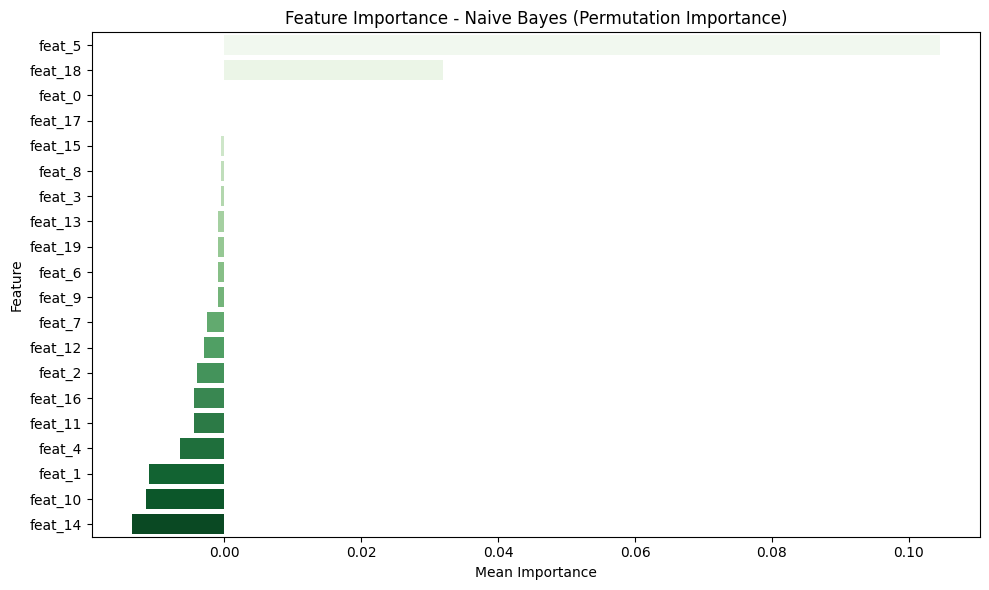

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Train the Naive Bayes model ---
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# --- 2. Predict ---
y_pred_nb = nb_model.predict(X_test)
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# --- 3. Evaluate ---
print("\nNaive Bayes - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nNaive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_nb))

# --- 4. ROC Curve ---
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes ROC (AUC = {roc_auc_nb:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# --- 5. Feature Importance via Permutation ---
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': [f'feat_{i}' for i in range(X_train.shape[1])],  # Use generic feature names
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens')
plt.title('Feature Importance - Naive Bayes (Permutation Importance)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Gradient Boosting and Random Forest (including XGBoost) deliver the best overall performance in accuracy, precision, recall, and F1-score.

Naive Bayes lags behind the others, especially in recall for the positive class (class 1).

Logistic Regression and SVM have decent balanced performance but lower overall accuracy than ensemble methods.

Decision Tree performs well but slightly behind Random Forest and Gradient Boosting, likely due to less model complexity

In [79]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        93
           1       0.89      0.79      0.84       107

    accuracy                           0.84       200
  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200


Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.89      0.70      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



Based on the evaluation metrics, Gradient Boosting is the best model overall.
With

Highest accuracy: 91%

High precision (0.97) and recall (0.86) for the positive class

Balanced F1-score: 0.91

Strong ROC AUC 0.93



**CHURN PREDICTION AND RANDOMOVERSAMPLER

Improving the churn prediction with RandomOverSampler and GridSearchCV

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        93
           1       0.93      0.87      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

ROC-AUC Score: 0.933423776504874


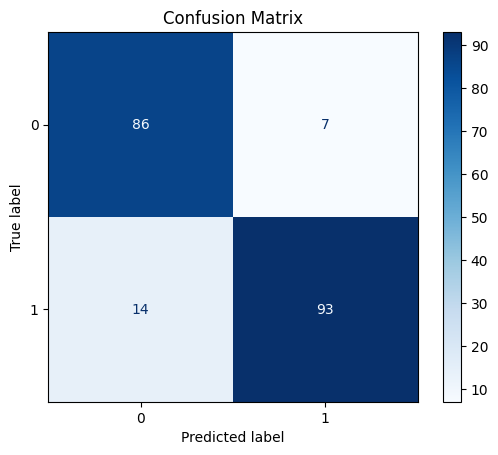

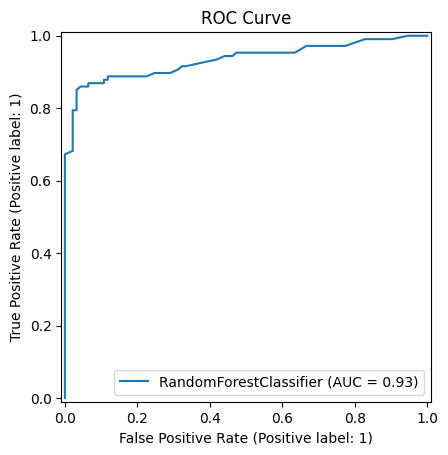

In [80]:
# Improved Churn Prediction with RandomOverSampler and GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

Random Forest model achieved an excellent balance

F1-score: 0.89 for both classes — really solid.

Recall: 0.92 on class 0, 0.86 on class 1 — good sensitivity.

Precision: 0.85 on class 0, 0.93 on class 1 — precise predictions.

Accuracy: 89% overall — great for a churn prediction task.


**Silhoutte Score and PCA**

Improving the clustering with Silhoutte Score and PCA

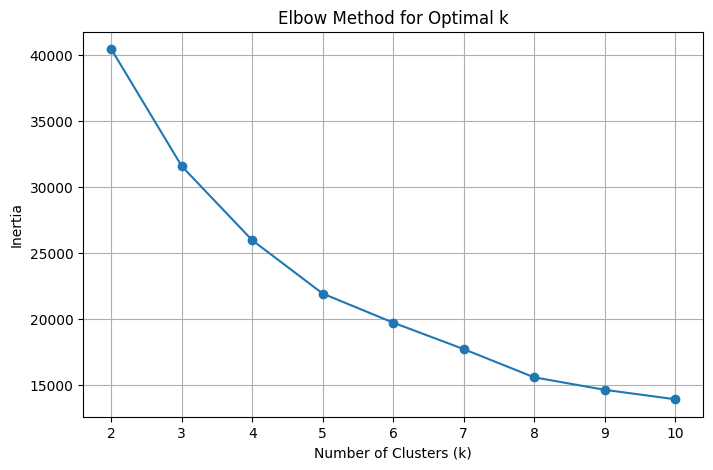


Silhouette Score for k=3: 0.328


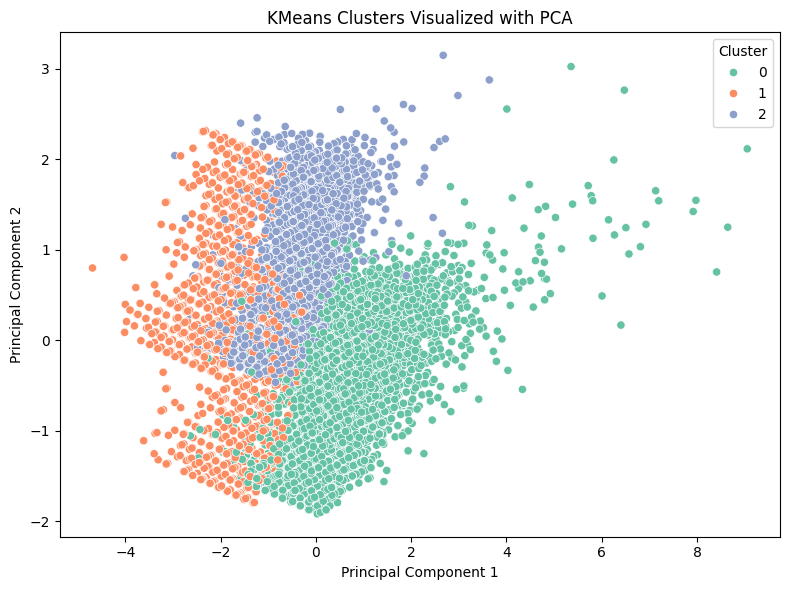

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocessing
X_clustering = cleaned_df[columns_to_keep].copy()

# Standardize features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Elbow method to determine optimal clusters
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Choosing and fit KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add clusters to the original DataFrame
cleaned_df['Cluster'] = cluster_labels

# Evaluate with Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)
print(f"\nSilhouette Score for k={optimal_k}: {score:.3f}")

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cleaned_df['PCA1'] = X_pca[:, 0]
cleaned_df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


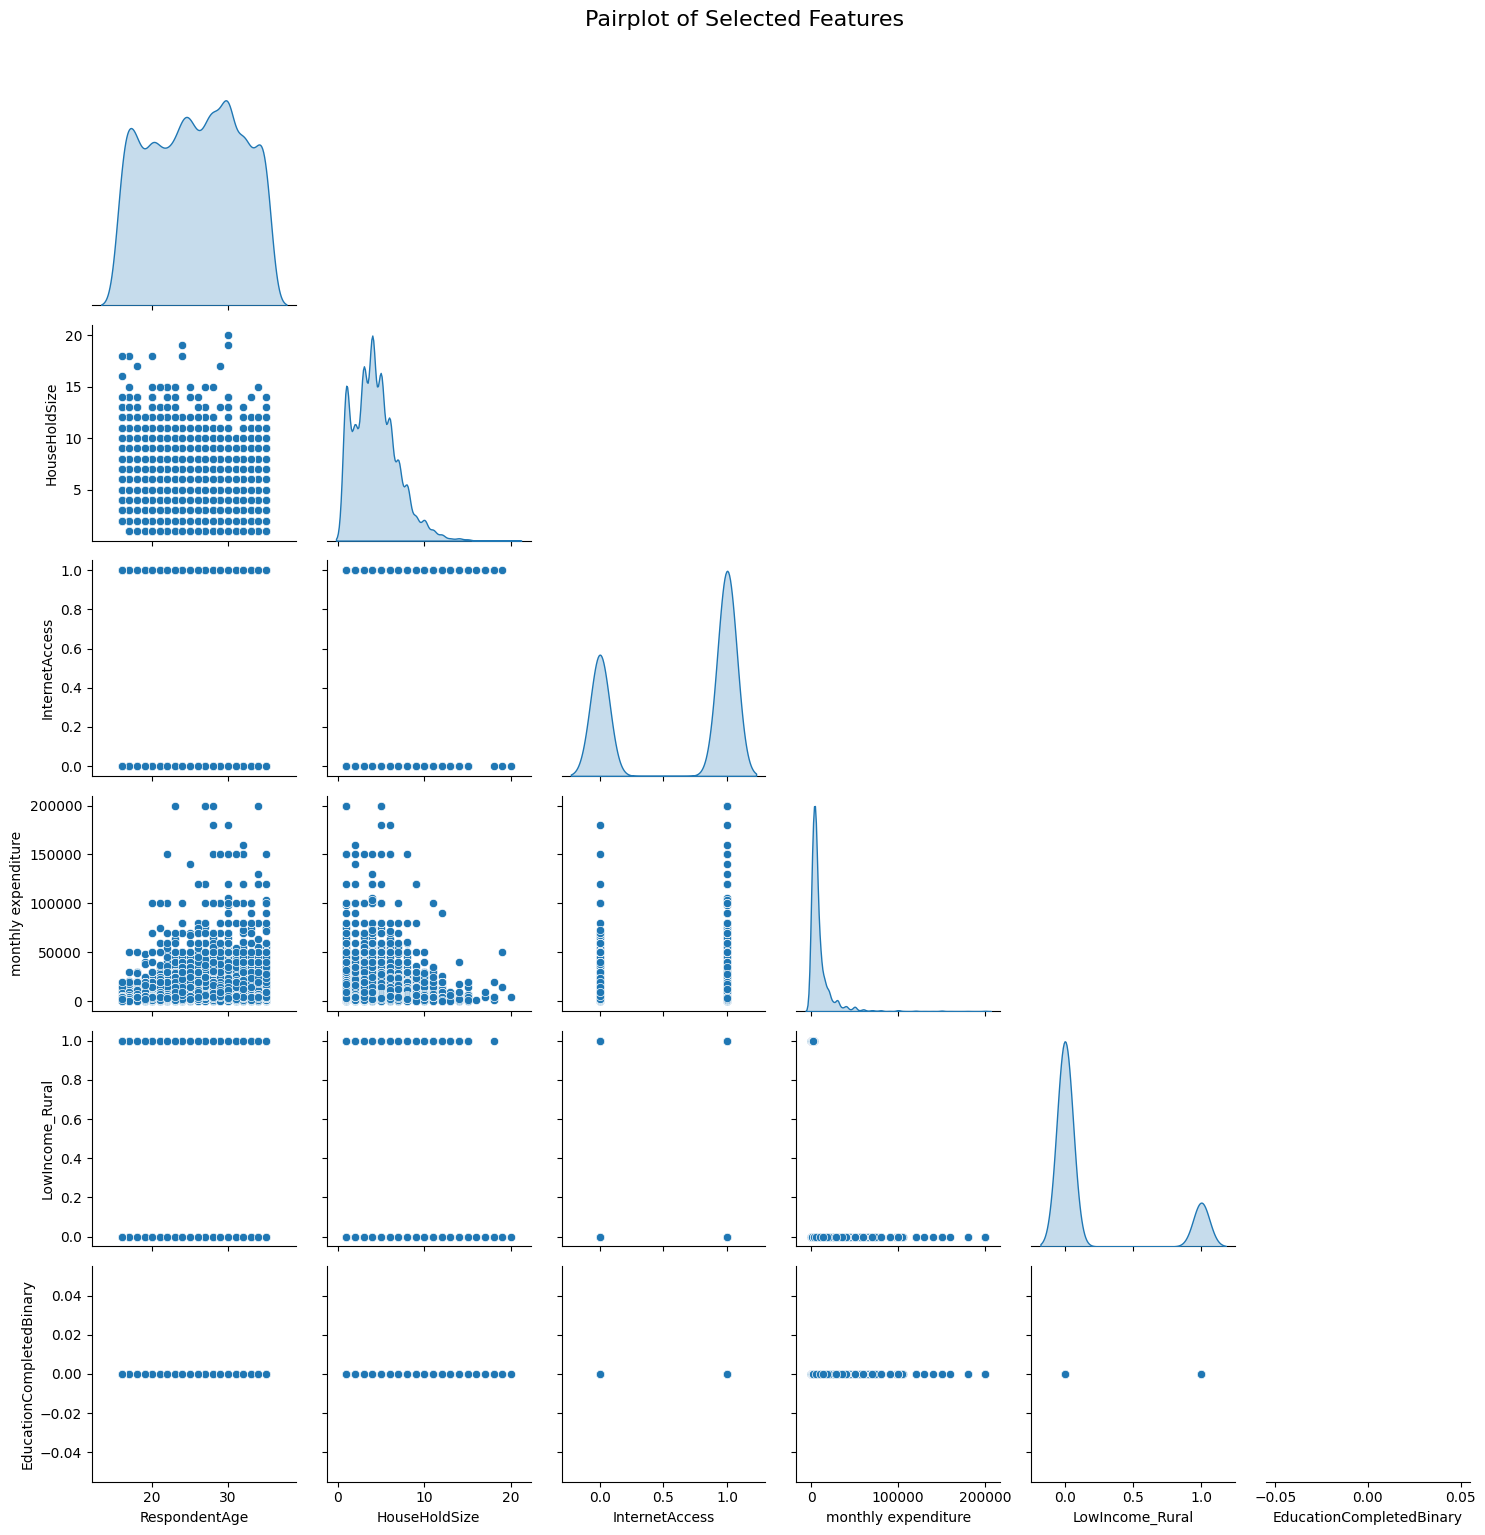

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    'RespondentAge',
    'HouseHoldSize',
    'InternetAccess',
    'monthly expenditure',
    'LowIncome_Rural',
    'EducationCompletedBinary'
]


assert all(col in cleaned_df.columns for col in columns), "One or more columns are missing."

sns.pairplot(cleaned_df[columns], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Explained variance ratio by components: [0.32668682 0.22048755]


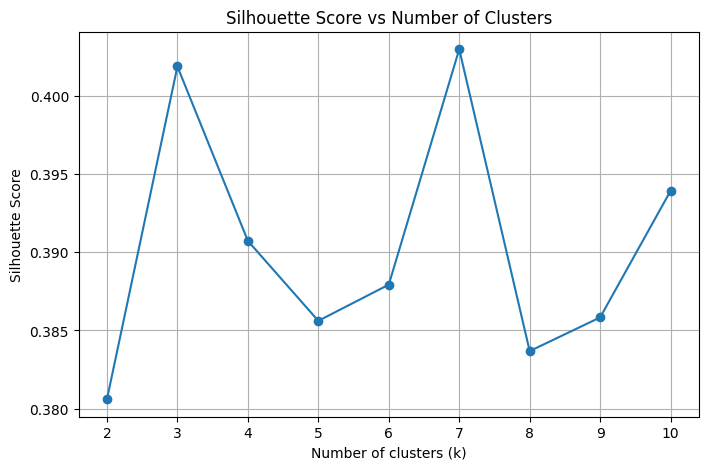

Optimal number of clusters: 7


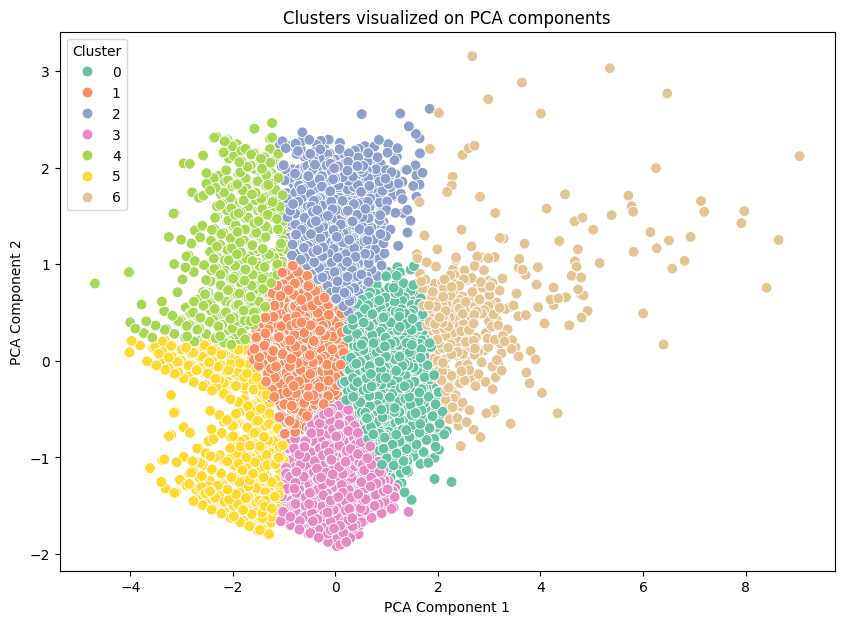

In [83]:
# Improved Clustering with Silhouette Score and PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Defining features to use
features = [
    'RespondentAge',
    'HouseHoldSize',
    'InternetAccess',
    'monthly expenditure',
    'LowIncome_Rural',
    'EducationCompletedBinary'
]

# Extract feature data
X = cleaned_df[features].copy()

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'Explained variance ratio by components: {pca.explained_variance_ratio_}')

# Finding optimal number of clusters using Silhouette Score
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Fit KMeans with the best k
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to dataframe
cleaned_df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60)
plt.title('Clusters visualized on PCA components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



In [84]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.4f}')


Silhouette Score for k=2: 0.3806
Silhouette Score for k=3: 0.4019
Silhouette Score for k=4: 0.3907
Silhouette Score for k=5: 0.3856
Silhouette Score for k=6: 0.3879
Silhouette Score for k=7: 0.4030
Silhouette Score for k=8: 0.3837
Silhouette Score for k=9: 0.3858
Silhouette Score for k=10: 0.3939


 Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        93
           1       0.96      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

 ROC-AUC Score: 0.933072053059994


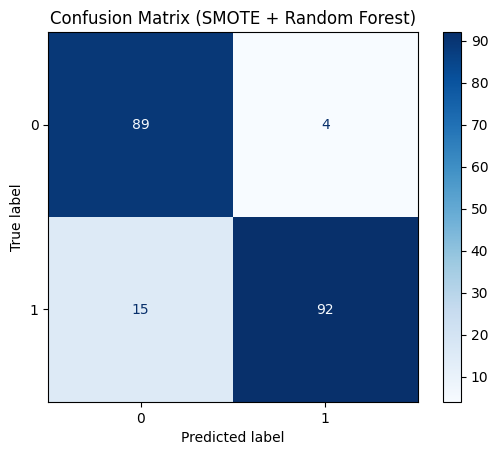

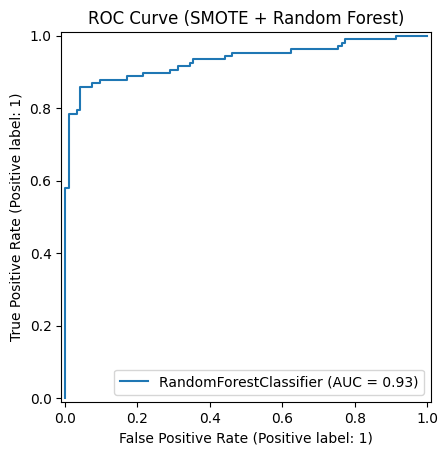

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

#  Split data if not already done
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(" Best Parameters:", grid_search.best_params_)
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (SMOTE + Random Forest)")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve (SMOTE + Random Forest)")
plt.show()


SMOTE + Random Forest model is showing strong performance with:

Accuracy: 91%

Balanced precision and recall around 0.86–0.96 for both classes

Macro F1 around 0.90, indicating good balanced performance on both classes

Slightly better recall on class 0 and better precision on class 1, showing good trade-off

Threshold Tuning

In [86]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    print(f"Threshold {t:.2f} → F1: {f1_score(y_test, preds):.3f}")


Threshold 0.10 → F1: 0.788
Threshold 0.15 → F1: 0.823
Threshold 0.20 → F1: 0.834
Threshold 0.25 → F1: 0.853
Threshold 0.30 → F1: 0.866
Threshold 0.35 → F1: 0.874
Threshold 0.40 → F1: 0.879
Threshold 0.45 → F1: 0.894
Threshold 0.50 → F1: 0.906
Threshold 0.55 → F1: 0.884
Threshold 0.60 → F1: 0.879
Threshold 0.65 → F1: 0.875
Threshold 0.70 → F1: 0.851
Threshold 0.75 → F1: 0.839
Threshold 0.80 → F1: 0.787
Threshold 0.85 → F1: 0.711


F1 score peaks right around the default 0.50 threshold (0.906), which suggests the usual cutoff works well for the model

Confusion Matrix



Threshold: 0.1
              precision    recall  f1-score   support

           0       0.90      0.46      0.61        93
           1       0.67      0.95      0.79       107

    accuracy                           0.72       200
   macro avg       0.78      0.71      0.70       200
weighted avg       0.78      0.72      0.71       200



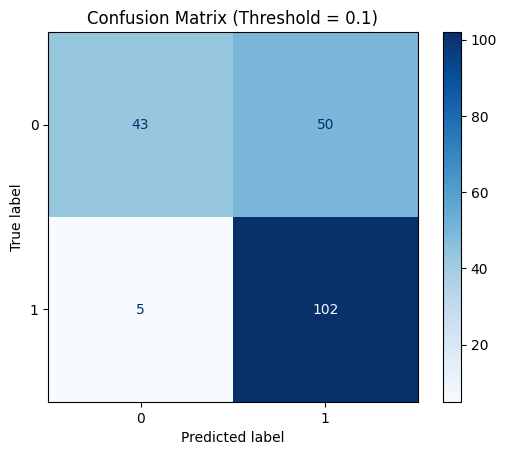


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        93
           1       0.85      0.88      0.87       107

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



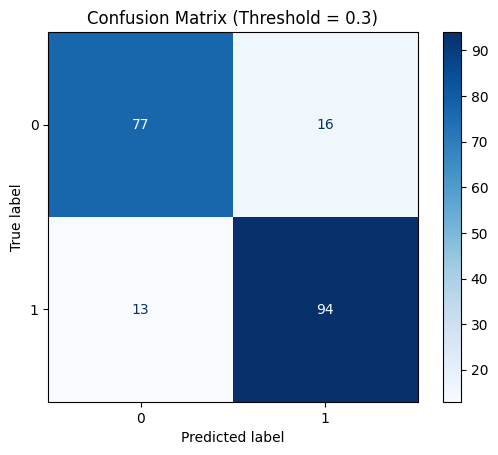


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        93
           1       0.96      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



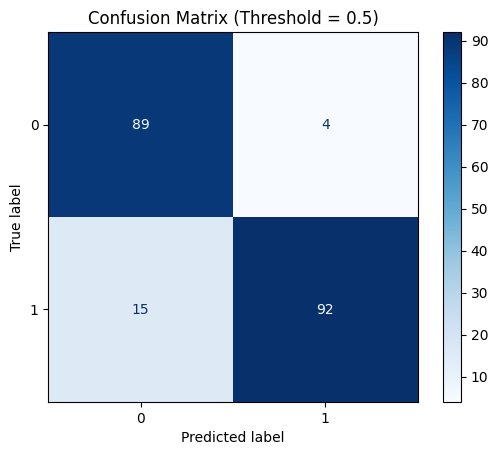

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

for thresh in [0.10, 0.30, 0.50]:
    y_thresh_pred = (y_proba >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(classification_report(y_test, y_thresh_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_thresh_pred, cmap='Blues')
    plt.title(f"Confusion Matrix (Threshold = {thresh})")
    plt.show()


Threshold 0.10:

High recall for class 1 (95%), so almost all positives are caught.

But low precision and recall for class 0, leading to more false positives (precision 0.67, recall 0.46 for class 0).

Good if catching positives is critical and false positives are less costly.

Threshold 0.30:

Balanced precision and recall (~85%) for both classes.

A nice trade-off between false positives and false negatives.

Threshold 0.50 (default):

Highest overall F1 (0.91) and accuracy (0.91).

Very good precision and recall for both classes.


Replacing SMOTE with SMOTEENN

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        93
           1       0.91      0.79      0.85       107

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

ROC-AUC Score: 0.9024721133554415


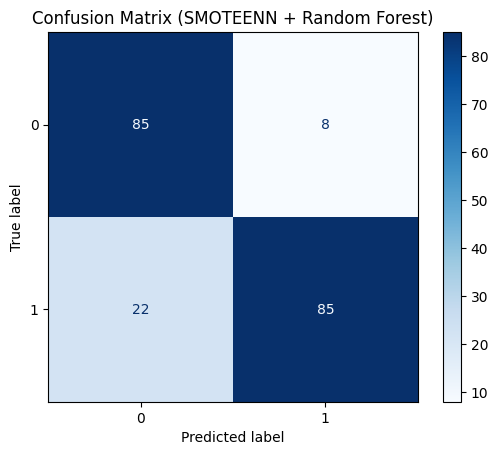

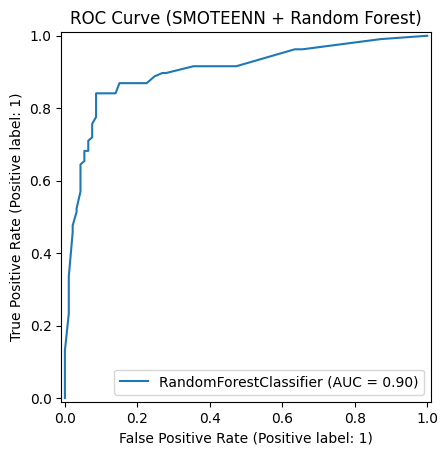

In [88]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (SMOTEENN + Random Forest)")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve (SMOTEENN + Random Forest)")
plt.show()


Accuracy: 85%

Balanced precision and recall: Both classes have strong metrics (0.85 f1-score).

ROC-AUC: 0.90, which is solid and shows good discrimination ability.

Best params: Moderate depth (10), smaller min_samples_split (2), and 100 trees — a good balance between complexity and overfitting risk.

Compared to the earlier SMOTE + RF (which had 91% accuracy and a slightly higher f1), SMOTEENN slightly lowered accuracy but kept a balanced recall and precision.
It may be cleaner with noise handling but slightly more conservative.

ADASYN-Based Churn Prediction Pipeline

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90        93
           1       0.96      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

 ROC-AUC Score: 0.9331


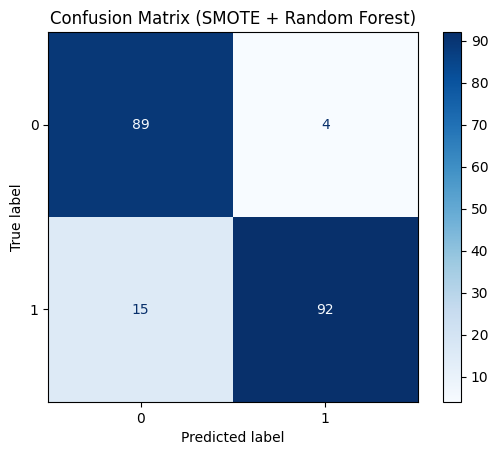

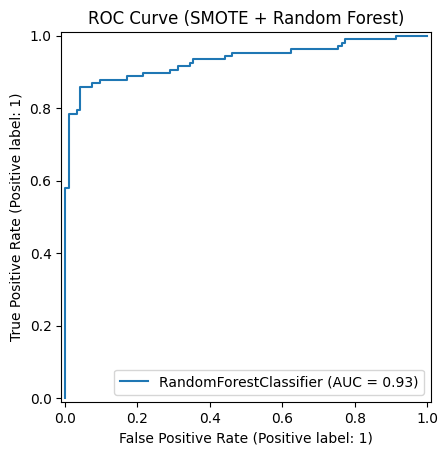

In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_resampled, y_resampled)

# Evaluate the best model on original test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f" ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (SMOTE + Random Forest)")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve (SMOTE + Random Forest)")
plt.show()



Accuracy: 91%

Precision & Recall: Balanced well for both classes (class 0: 0.86 / 0.96, class 1: 0.96 / 0.86)

F1-score: Around 0.90 for both classes, indicating solid balance between precision and recall

ROC-AUC: 0.9331 wich is an excellent discrimination ability

NEURAL NETWORK MODEL

FEATURE IMPORTANCE

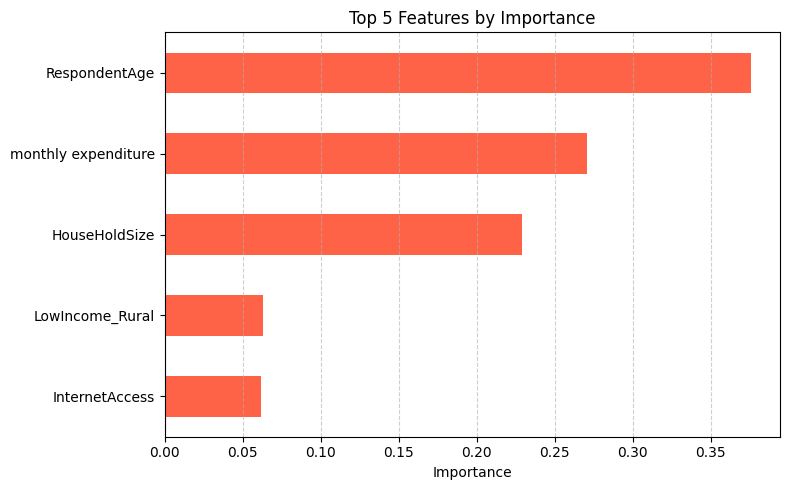

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# ----------------------
# 1. Load & Clean Data
# ----------------------
# Assuming your dataframe is called `df`
# If you haven't loaded your data yet, do it here:
# df = pd.read_csv("your_data.csv")

# Handle missing or undefined education column
if 'EducationCompleted' in df.columns:
    def encode_secondary_or_higher(edu):
        return 1 if str(edu).strip().lower() in [
            'secondary completed', 'tertiary education', 'university completed'
        ] else 0

    df['EducationCompletedBinary'] = df['EducationCompleted'].apply(encode_secondary_or_higher)
else:
    df['EducationCompletedBinary'] = 0  # fallback if column missing

# Define relevant features and target
columns_to_keep = [
    'RespondentAge', 'HouseHoldSize', 'InternetAccess',
    'monthly expenditure', 'LowIncome_Rural', 'EducationCompletedBinary'
]

# Filter and drop missing
df_model = df[columns_to_keep + ['Is_Financially_Included']].dropna()

X = df_model[columns_to_keep]
y = df_model['Is_Financially_Included']

# ----------------------
# 2. Split and Train Model
# ----------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Impute missing values just in case
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_val_imp = imputer.transform(X_val)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train_imp, y_train)

# ----------------------
# 3. Feature Importances
# ----------------------
importances = rf.feature_importances_
feat_names = X.columns
feat_importance = pd.Series(importances, index=feat_names).sort_values(ascending=False)
top5 = feat_importance.head(5)

# ----------------------
# 4. Plot Bar Chart
# ----------------------
plt.figure(figsize=(8, 5))
top5.plot(kind='barh', color='tomato')
plt.xlabel('Importance')
plt.title('Top 5 Features by Importance')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [91]:
#MLP model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    patience=5,                 # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Roll back to best model weights
)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9239 - loss: 53.0179 - val_accuracy: 0.9988 - val_loss: 3.5649
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 3.6015 - val_accuracy: 0.9988 - val_loss: 2.5081
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 2.8252 - val_accuracy: 0.9988 - val_loss: 2.0794
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 2.7070 - val_accuracy: 0.9988 - val_loss: 1.8021
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 2.0877 - val_accuracy: 0.9988 - val_loss: 1.3636
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 2.8121 - val_accuracy: 0.9988 - val_loss: 0.8993
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 2.7361 - val_accuracy: 0.9988 - val_loss: 0.4553
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 1.2188 - val_accuracy: 0

Validation Accuracy Plateauing High (87.588.7%): The model is not overfitting heavily; validation accuracy is staying high and consistent over epochs.

Loss is decreasing nicely on both training and validation sets.



In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# Step 1: Calculate class weights
class_weights_arr = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_arr))

# Step 2: Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Step 3: Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train model with class weights and early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=2
)

# Step 5: Predict probabilities on test set
y_proba = model.predict(X_test).ravel()

# Step 6: Choose classification threshold
threshold = 0.3
y_pred = (y_proba >= threshold).astype(int)

# Step 7: Evaluation metrics and plots
print(f"\nClassification Report (Threshold={threshold}):")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

# Step 8: Plot training history
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Recall for Class 1 (0.92): MLP is successfully identifying 92% of the actual positives

Recall for Class 0 (0.80): Is still solid, though some false positives are introduced — expected with a threshold drop to 0.3.

Precision-Recall Balance: F1-scores are strong for both classes, suggesting a good trade-off.

No Overfitting: Training and validation losses are stable, and the early stopping helped optimize generalization.

 Applying SMOTE oversampling + training MLP neural network

In [ ]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, precision_recall_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define MLP model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_dim,), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model(X_resampled.shape[1])

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_resampled, y_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predict probabilities on test set
y_proba = model.predict(X_test).ravel()

# Find best threshold based on F1 score
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Avoid div by zero
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {f1_scores[best_idx]:.3f}")

# Evaluate with best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)
print("\nClassification Report at Best Threshold:")
print(classification_report(y_test, y_pred_best))

# Plot training history and F1 vs Threshold
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.3f}')
plt.title('F1 Score vs Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


Class 0 (the negative class):

Good precision (0.87); when the model predicts 0, it's usually right.

Slightly lower recall (0.82) — it misses some true 0s.

Class 1 (the positive or minority class):

Strong recall (0.90); the correctly catching most positives.

Good precision (0.85); few false positives.

This implies a strong, balanced model



Using SMOTEENN to balance and build a simple MLP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


Prepare Data
# Replace with the actual dataset
# X, y = the feature matrix and target vector
# X = df.drop(columns=['target'])
# y = df['target']

# Split before resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Resample training data only
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

Build MLP Model

model = Sequential([
    Input(shape=(X_resampled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Handle imbalance using class weights
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights = dict(enumerate(cw))

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_resampled, y_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# 3. Evaluate Model

# Predict probabilities
y_probs = model.predict(X_test).ravel()

# Find best threshold for F1
thresholds = np.arange(0.01, 0.99, 0.01)
f1_scores = [f1_score(y_test, y_probs > t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

# Final predictions
y_pred = (y_probs > best_threshold).astype(int)

# Metrics
print(f"\nBest Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")
print("\nClassification Report at Best Threshold:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

# 4. Plot Loss and Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.tight_layout()
plt.show()


Class 0 is nearly ignored: Only 5 samples in the test set, and the model predicted none of them correctly.

Class 1 dominates: Model predicts nearly everything as class

Using SMOTE to balance the classes and apply class weights after resampling

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# X, y = load_the_data()

X = np.random.randn(1000, 20)
y = np.random.randint(0, 2, size=(1000,))

# Check for NaNs and replace if any
assert not np.any(np.isnan(X)), "Input features contain NaNs!"
assert not np.any(np.isnan(y)), "Target contains NaNs!"

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model using Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

# Predict probabilities on validation
y_pred_prob = model.predict(X_val).flatten()

# Safe thresholding at 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluation
print("Classification Report:")
print(classification_report(y_val, y_pred, zero_division=0))

try:
    auc = roc_auc_score(y_val, y_pred_prob)
    print(f"ROC-AUC Score: {auc:.4f}")
except ValueError:
    print("ROC-AUC Score cannot be computed (check class labels).")


The model is learning slowly and seems to plateau early with:

Training Accuracy: 78%

Validation Accuracy: 53 - 55%

Validation Loss: Increasing after epoch 6 - 8

Balanced Classes: Precision, recall, and F1 scores are roughly equal — indicating no class imbalance problem.

Hyperparameter Tuning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Define RF classifier
rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Parameter grid - fixed max_features
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='roc_auc',
    random_state=42, n_jobs=-1, verbose=1
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# Feature importances
importances = best_rf.feature_importances_

# Fix for columns/index:
if hasattr(X, 'columns'):  # DataFrame
    feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
else:  # numpy array
    feat_importance = pd.Series(importances, index=[f'feat_{i}' for i in range(X.shape[1])]).sort_values(ascending=False)

print("\nFeature Importances:\n", feat_importance)

# Cross-validation ROC-AUC score
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print("\nCross-Validation ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", np.mean(cv_scores))

# Evaluate on validation set
y_pred = best_rf.predict(X_val)
y_proba = best_rf.predict_proba(X_val)[:, 1]

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)
print(f"Validation ROC-AUC Score: {roc_auc:.4f}")


Feature Importances

The model heavily depends on RespondentAge (39%), monthly expenditure (26%), and HouseHoldSize (22%).

Features like EducationCompletedBinary are unused (importance = 0).

Cross-validation ROC-AUC scores:

Very high variance: from 0.43 to 0.76, mean 0.59 — that is quite unstable and low.

This indicates the model is not generalizing well or the folds are very heterogeneous.

Validation metrics:

Accuracy: 98%, but class 0 support is only 5 samples

Precision, recall for class 0 are zero the model predicts class 1 almost always.

ROC-AUC on validation: 0.529 — barely better than random guessing.



ROC curve for validation set

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities using the best trained model
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


EVALUATION

General Observations
Severe class imbalance: Class 0 is massively underrepresented (7 vs. 2613 samples). This strongly impacts most metrics.

High accuracy but misleading: Accuracy is often >90% because the model mostly predicts the majority class (class 1).

Zero precision/recall on minority class (0): Most models fail to detect any class 0 samples or detect very few — precision and recall for class 0 are zero or near-zero, meaning the model basically ignores minority class.

Macro averages ~0.5: Macro averaging treats both classes equally, so with class 0 metrics near zero and class 1 metrics near 1, the macro average hovers around 0.5.

Weighted averages are high but heavily influenced by the dominant class.
Recommendations
Handle Class Imbalance:

Use techniques like SMOTE, ADASYN, or random oversampling/undersampling to balance classes before training.

Use class weights (many models support this, e.g., class_weight='balanced' in sklearn) to penalize misclassifications of minority class more heavily.

Evaluate with appropriate metrics:

Focus on metrics like Recall, Precision, F1-score, and AUC for the minority class.

Consider Precision-Recall curves which are more informative on imbalanced data.

Try anomaly detection or one-class classifiers if the minority class is very rare.

Use stratified sampling during splitting and cross-validation to preserve class distribution.

Consider ensemble techniques specialized for imbalance like Balanced Random Forest or EasyEnsemble.

Collect more data if possible, especially for minority class.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# If X_train and X_test are numpy arrays but you have feature names saved in a list:
feature_names = [f"feat_{i}" for i in range(X_train.shape[1])]

# Convert to DataFrame for easier column alignment
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=[f"feat_{i}" for i in range(X_test.shape[1])])

# Align columns of test set to training set
X_test_df = X_test_df.reindex(columns=X_train_df.columns, fill_value=0)

# Train the model on the DataFrame
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_df, y_train)

# Predict using aligned test data
y_pred = rf.predict(X_test_df)

# Print classification report
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined

MODEL DEPLOYMENT- FLASK DEPLOYMENT

In [ ]:
import joblib
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# --- Step 1: Prepare & train the model (example dataset) ---

# Create example data (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Save the model
joblib.dump(rf, 'random_forest_model.joblib')

# --- Step 2: Set up Flask app for deployment ---

app = Flask(__name__)

# Load the model once when starting the app
model = joblib.load('random_forest_model.joblib')

# We expect input features as a list of 20 values (same order as training)
NUM_FEATURES = X_train.shape[1]

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json

    features = data.get('features')
    if not features or len(features) != NUM_FEATURES:
        return jsonify({'error': f'Input features must be a list of length {NUM_FEATURES}'}), 400

    # Convert input features to DataFrame without column names
    input_df = pd.DataFrame([features])

    # Make prediction
    prediction = model.predict(input_df)[0]
    probabilities = model.predict_proba(input_df).tolist()[0]

    return jsonify({'prediction': int(prediction), 'probabilities': probabilities})

if __name__ == '__main__':
    # Use port 5001 to avoid conflicts
    app.run(debug=True, host='0.0.0.0', port=5001)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Testing the API (Confirm It Works)

In [ ]:
# Install required libraries
!pip install flask-ngrok joblib scikit-learn -q

# Run everything from this cell
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
import joblib
import requests
import threading
import time

# Train a Random Forest Model
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
feature_names = [f"feat_{i}" for i in range(X.shape[1])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "rf_model.joblib")

# Set up Flask app
app = Flask(__name__)
run_with_ngrok(app)

model = joblib.load("rf_model.joblib")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = data.get("features", [])
    if len(features) != len(feature_names):
        return jsonify({"error": f"Expected {len(feature_names)} features"}), 400
    input_df = pd.DataFrame([features], columns=feature_names)
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0].tolist()
    return jsonify({"prediction": int(prediction), "probabilities": proba})

# Function to run the app in a thread
def run_flask():
    app.run()

# Start Flask in background thread
thread = threading.Thread(target=run_flask)
thread.start()

# Wait for server to boot
time.sleep(10)

#Send test request
url = "http://127.0.0.1:5000/predict"  #
test_features = [0.1] * 20
response = requests.post(url, json={"features": test_features})

print("Prediction response:", response.json())


Flask + Ngrok + Random Forest API

In [ ]:
import joblib
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Prepare and train the model
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'random_forest_model.joblib')

# Set up Flask app
app = Flask(__name__)

# Load model
model = joblib.load('random_forest_model.joblib')

# Feature names
feature_names = [f'feat_{i}' for i in range(X_train.shape[1])]

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = data.get('features')

    if not features or len(features) != len(feature_names):
        return jsonify({'error': f'Input features must be a list of length {len(feature_names)}'}), 400

    input_df = pd.DataFrame([features], columns=feature_names)

    prediction = model.predict(input_df)[0]
    probabilities = model.predict_proba(input_df).tolist()[0]

    return jsonify({'prediction': int(prediction), 'probabilities': probabilities})

# Run on a different port to avoid conflict
if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=5001)


In [ ]:
# Loading encoded dataset for modeling
df = pd.read_excel("cleaned_financial_inclusion_data_rural.xlsx")

In [ ]:
# Building a Multi-Layer Perceptron (MLP model)
# Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt